# <span style="color:#ffcc33">This notebook contains many of the descriptive statistics and analyses that were generated for the Mille Lacs Casino live case competition for the University of Minnesota's MSBA 6410 Fall 2019 course.</span>
    
# <span style="color:#ffcc33">The analyses were created using data provided by MCLV and ONLY data provided by MCLV.  This notebook is not for public consumption and should not be used in any other context than to review the code and the visualizations that were generated for the live competition.</span>

# <span style="color:#ffcc33">Please do not reproduce or republish this code without written consent of the author below.</span>

- <b>Course</b>: <i>MSBA 6410 - Exploratory Analytics</i>
- <b>Semester</b>: <i>Fall 2019</i>
- <b>Group</b>: <i>1 (!)</i>
- <b>Author</b>: <i>Danny Moncada, University of Minnesota - Office of Human Resources - Data & Reporting Analyst</i>

# This Jupyter/iPython notebook contains analyses utilizing both Python and R.

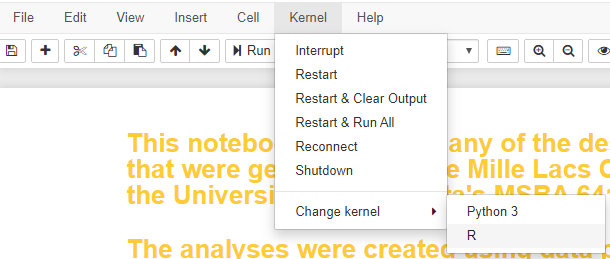

## After each import, I will show the package details, in case they are needed to reproduce the results show in the notebook.  Let's begin!

# <span style="color:#ffcc33">MCLV  Exploratory Analytics - Python Part I.</span>

- Start with Python kernel
- Load the appropriate libraries
- Load the data files
- Begin the initial exploration
- Generate plots
- Assess and draw conclusions

In [1]:
## Provide a wider display for easier viewing and HTML to show tables in a better format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
## Import the necessary libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import sys

In [14]:
## Show the Python environment details

print("Here are the environment details...")
print()
print(sys.executable)
print(sys.version)
print(sys.version_info)

## Show the different versions for each library used in the Python exploration
print()
print("This notebook is using pandas version: {}.".format(pd.__version__))
print("This notebook is using pandas version: {}.".format(pd.__version__))
print("This notebook is using numpy version: {}.".format(np.__version__))
print("This notebook is using seaborn version: {}.".format(sns.__version__))
print("This notebook is using matplotlib version: {}.".format(matplotlib.__version__))

Here are the environment details...

C:\Python\envs\MSBA2020\python.exe
3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)

This notebook is using pandas version: 0.25.3.
This notebook is using pandas version: 0.25.3.
This notebook is using numpy version: 1.16.4.
This notebook is using seaborn version: 0.9.0.
This notebook is using matplotlib version: 3.1.2.


In [4]:
## Remove some warnings for pandas - they clutter the notebook
import warnings
warnings.simplefilter(action='ignore', category=[FutureWarning, DeprecationWarning])

import warnings
warnings.filterwarnings("ignore")

In [5]:
## Find the data files first - this will be different on your machine!

team_folder = "D:/Group Folder/Datasets/"

coupon_grp = "CouponGroup.csv"

coupon_dim = "DimCoupon.csv"

player_dim = "DimPlayer.csv"

coupon_fact = "FactCouponRedeem.csv"

player_day = "PlayerDay.csv"

zipcodes = "zipcode.csv"

In [6]:
## Confirm that the folder and data file names concatenate correctly

team_folder + coupon_grp

'D:/Group Folder/Datasets/CouponGroup.csv'

# <span style="color:#ffcc33">Data Loading & Pre-Processing - Reedemed Coupon Fact Table</span>

In [7]:
## Load in the fact table - just do it in one shot
## We use low_memory = False because it is mixed data types
## I hope your machines aren't as heavily used as our VMs were to generate these analyses!

coupon_fact_df = pd.read_csv(team_folder+coupon_fact, low_memory = False, 
                             encoding = "cp1252")

In [8]:
## Generate some summary statistics of the dataframe, just to see if there are missing values
## Or any strange abnormalities in the data

coupon_fact_df.describe()

,CouponID,PlayerID,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear
count,2.777358e+06,2.777358e+06,2.777358e+06,2.777358e+06,2.777358e+06,1.907100e+05,2.777358e+06,2.777358e+06
mean,9.274712e+04,7.053240e+08,2.386644e+01,1.004516e+00,1.578012e+00,1.858328e+07,6.218163e+00,1.738322e+01
std,1.486246e+04,2.599271e+08,2.688272e+01,8.191522e-02,4.938768e-01,1.110173e+06,3.262830e+00,1.891812e+00
min,1.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.666513e+07,1.000000e+00,5.000000e+00
25%,9.124200e+04,5.303723e+08,1.000000e+01,1.000000e+00,1.000000e+00,1.764133e+07,4.000000e+00,1.700000e+01
50%,9.484000e+04,7.103038e+08,2.300000e+01,1.000000e+00,2.000000e+00,1.867601e+07,6.000000e+00,1.800000e+01
75%,9.906600e+04,1.000156e+09,2.900000e+01,1.000000e+00,2.000000e+00,1.961201e+07,9.000000e+00,1.800000e+01
max,1.034460e+05,1.000805e+09,5.000000e+03,1.000000e+01,2.000000e+00,2.029006e+07,1.200000e+01,2.200000e+01


In [16]:
## Confirm the row count for the fact table - to understand how much 

print("There are {} rows in the Coupon Redeedem Fact table.".format(len(coupon_fact_df)))

There are 2777358 rows in the Coupon Redeedem Fact table.


In [17]:
## Review the column names - to understand what different attributes are available in the fact table

coupon_fact_df.columns

Index(['CouponID', 'Description', 'PlayerID', 'AccountingDate', 'RedeemValue',
       'RedeemCount', 'SiteID', 'RedemptionNumber', 'ValidMonth', 'ValidYear',
       'TypeCategory', 'TypeDescription', 'SubType', 'SubTypeDescription',
       'TargetPopKey', 'TargetPop', 'ProgramTypeKey', 'ProgramType'],
      dtype='object')

In [18]:
## Create a new field with Date in the right format - so we can generate a Month and Year column

coupon_fact_df["Date"] = pd.to_datetime(coupon_fact_df["AccountingDate"])

In [19]:
## Create two columns using the newly generated Date field to extract Month and Year
## We'll use this to aggregate and help our analyses run a little faster

coupon_fact_df["Month"] = coupon_fact_df["Date"].dt.month
coupon_fact_df["Year"] = coupon_fact_df["Date"].dt.year

In [20]:
## View the first five rows of the table

coupon_fact_df.head(5)

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,...,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType,Date,Month,Year
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2017-01-01,1,2017
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,...,Other,O,Other,c,New Member,N,Not Applicable,2017-01-01,1,2017


In [21]:
## Determine if there are any records in the fact table with 0 in the "RedeemCount" field
## Anything with zero means it did not get redeemed and should be excluded

coupon_fact_df.RedeemCount.unique()

array([ 1,  2,  0,  4,  3,  5, 10,  8,  6,  9], dtype=int64)

In [22]:
## Remove those rows with nothing in the RedeemCount - so we just look at redeemed coupons

redeemed_coupon_df = coupon_fact_df[coupon_fact_df.RedeemCount != 0]

In [23]:
## Create some variables to show the length of the two facts, the original and the new one.

original_fact_row_count = len(coupon_fact_df)

reduced_fact_row_count = len(redeemed_coupon_df)

print("We removed {} rows by dropping any coupons with a redeem count of 0."\
                  .format(np.abs(reduced_fact_row_count - original_fact_row_count)))

We removed 227 rows by dropping any coupons with a redeem count of 0.


# First demonstration of dimensionality reduction - Aggregation

#### By summarizing the data using an aggregate table, we don't have to concern ourselves with having to process the entire data set.

- `Curse of dimensionality`: more dimensions leads to "sparser" data; this can affected distance metrics in certain algorithms, probability distributions begin to behave in problematic ways, and "noise" from irrelevant dimensions may block out "signal" from relevant dimensions.

In [266]:
## Build an aggregate table of all redeemed coupons
## Group by time, casino site, type, and sub type
## Use this to determine "successful" promotions

redeemed_coupon_aggregation = redeemed_coupon_df.groupby(["Month", "Year", "SiteID", "TypeDescription", 
                        "SubTypeDescription"]) \
                            .agg({"RedeemCount": ["sum", "count", "mean", "min", "max"]}).reset_index()

In [267]:
## Check row count of newly created table

len(redeemed_coupon_aggregation)

987

In [268]:
## Show the first 10 rows of the first aggregation to see what type/subtypes are being redeemed the most

redeemed_coupon_aggregation.sort_values(by = ("RedeemCount", "sum"), ascending = False).head(10)

Month  Year SiteID TypeDescription SubTypeDescription RedeemCount         \
                                                                  sum  count   
14      1  2017      2            Cash              Bonus       24004  24004   
95      2  2017      2            Cash              Bonus       22682  22682   
533     7  2017      2           Hotel                All       19005  19005   
620     8  2017      2           Hotel                All       18982  18982   
797    10  2017      2            Cash              Bonus       18499  18499   
43      1  2018      2            Cash              Bonus       18431  18431   
189     3  2017      2           Hotel                All       18009  18009   
362     5  2017      2           Hotel                All       17784  17784   
645     8  2018      2            Cash              Bonus       17264  17264   
279     4  2017      2           Hotel                All       17229  17220   

                       
         mean min max  
14   1.000000   1   1  
95   1.000000   1   1  
533  1.000000   1   1  
620  1.000000   1   1  
797  1.000000   1   1  
43   1.000000   1   1  
189  1.000000   1   1  
362  1.000000   1   1  
645  1.000000   1   1  
279  1.000523   1  10

In [20]:
## Remove siteID and date features to just get raw counts of each promotion

redeemed_coupon_type_sub_agg = redeemed_coupon_df.groupby(["TypeDescription", 
                        "SubTypeDescription"]) \
                            .agg({"RedeemCount": ["sum", "count", "mean", "min", "max"]}).reset_index()

In [21]:
## Get the sum of all of the columns, to determine how many redeemptions occurred over the time period of 
## data collection

total_redemptions = redeemed_coupon_type_sub_agg.sum()["RedeemCount"]["sum"]

In [22]:
print("The total number of redeemed coupons over the span of data collection is {}." \
        .format(redeemed_coupon_type_sub_agg.sum()["RedeemCount"]["sum"]))

The total number of redeemed coupons over the span of data collection is 2788763.


In [23]:
## Get the first 20 promotion type / sub type combinations based on the total number of redemptions

top_twenty_redeemed_promotion_types = \
            redeemed_coupon_type_sub_agg.sort_values(by = ("RedeemCount", "sum"), ascending = False).head(20)

In [24]:
## Create two new columns

## Calculate the % of redemptions using the entire data set

top_twenty_redeemed_promotion_types["% of overall total"] = \
            top_twenty_redeemed_promotion_types["RedeemCount"]["sum"] / total_redemptions * 100

## Calculate a running sum of the % to see which ones make up the largest portions

top_twenty_redeemed_promotion_types["cumulative % of overall total"] = \
            top_twenty_redeemed_promotion_types["% of overall total"].cumsum()

In [270]:
## Show the final table

HTML(top_twenty_redeemed_promotion_types.to_html(index = False))

Coupon Type,Coupon Subtype,Redemption Count,% of Overall Total,Cumulative % of Overall Total
Cash,Bonus,688847,24.700808,24.700808
Hotel,All,638501,22.895492,47.596300
Free Slot Gaming,Grand Play,290835,10.428817,58.025117
Cash,Mystery,290224,10.406908,68.432025
Cash,Cash,187025,6.706378,75.138404
Hotel,HK,135938,4.874491,80.012895
Other,Other,116120,4.163853,84.176748
Gift,Other,84195,3.019081,87.195828
Points,Match Point,79035,2.834052,90.029881
Hotel,ML,63634,2.281800,92.311681


## Now that we've seen that with the top twenty type/subtype combinations we are capturing about 99% of all of the redeemed coupons, we can then recreate the analysis so that it is much nicer to read

In [26]:
redeemed_coupon_type_analysis = redeemed_coupon_df.groupby(["TypeDescription", 
                        "SubTypeDescription"]) \
                            .agg({"RedeemCount": ["sum"]}).reset_index() ## Only sum is required, the other metrics
                                                                         ## do not provide any additional meaning
                                                                         ## or context.

In [27]:
## Rename the columns so they are more intuitive for the analyst

redeemed_coupon_type_analysis.columns = ["Coupon Type", "Coupon Subtype", "Redemption Count"]

In [28]:
## Get the first 20 promotion type / sub type combinations based on the total number of redemptions

top_twenty_redeemed_promotion_types = \
            redeemed_coupon_type_analysis.sort_values(by = "Redemption Count", ascending = False).head(20)

In [29]:
## Create two new columns
## Calculate the % of redemptions using the entire data set

top_twenty_redeemed_promotion_types["% of Overall Total"] = \
            top_twenty_redeemed_promotion_types["Redemption Count"] / total_redemptions * 100

## Calculate a running sum of the % to see which ones make up the largest portions

top_twenty_redeemed_promotion_types["Cumulative % of Overall Total"] = \
            top_twenty_redeemed_promotion_types["% of Overall Total"].cumsum()

In [30]:
## Display an nice presentation of the data table

HTML(top_twenty_redeemed_promotion_types.to_html(index = False))

Coupon Type,Coupon Subtype,Redemption Count,% of Overall Total,Cumulative % of Overall Total
Cash,Bonus,688847,24.700808,24.700808
Hotel,All,638501,22.895492,47.596300
Free Slot Gaming,Grand Play,290835,10.428817,58.025117
Cash,Mystery,290224,10.406908,68.432025
Cash,Cash,187025,6.706378,75.138404
Hotel,HK,135938,4.874491,80.012895
Other,Other,116120,4.163853,84.176748
Gift,Other,84195,3.019081,87.195828
Points,Match Point,79035,2.834052,90.029881
Hotel,ML,63634,2.281800,92.311681


## We see that these coupon type & sub type combinations

- Cash - Bonus
- Hotel - All
- Free Slot Gaming - Grand Play
- Cash - Mystery
- Cash - Cash

## make up 75% of redeemed coupons.  How do these change over time?

## Let's return to our original dataframe for this analysis, where we had observations over time.

## Let's do some additional clean up here, to rename some columns and only include what we need for the time series analysis.

In [32]:
## Observe the first five rows to see the structure of the table

redeemed_coupon_aggregation.head(5)

Month  Year SiteID   TypeDescription SubTypeDescription RedeemCount         \
                                                                  sum  count   
0     1  2017      1              Cash              Bonus       12919  12919   
1     1  2017      1              Cash               Cash        6753   6753   
2     1  2017      1              Cash            Mystery        3088   3088   
3     1  2017      1             Event            Concert           2      2   
4     1  2017      1  Free Slot Gaming              Bonus         791    791   

                
  mean min max  
0  1.0   1   1  
1  1.0   1   1  
2  1.0   1   1  
3  1.0   1   1  
4  1.0   1   1

In [33]:
## Rename the column names so they are more understandable
redeemed_coupon_aggregation.columns = ["Month", "Year", "Casino Site", "Coupon Type",
                                      "Coupon Sub Type", "Redemption Count", "Remove Count",
                                      "Remove Mean", "Remove Min", "Remove Max"]

## Subset the dataframe for the columns that we required for the next analysis
## We are overwriting the original variable name with this transformation - we have to be sure that we want this
## change!
redeemed_coupon_aggregation = \
        redeemed_coupon_aggregation[["Month", "Year", "Casino Site", "Coupon Type",
                                      "Coupon Sub Type", "Redemption Count"]]

In [34]:
## Now the table is ready for the next analysis!

redeemed_coupon_aggregation.head()

,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count
0,1,2017,1,Cash,Bonus,12919
1,1,2017,1,Cash,Cash,6753
2,1,2017,1,Cash,Mystery,3088
3,1,2017,1,Event,Concert,2
4,1,2017,1,Free Slot Gaming,Bonus,791


## As above, we want to just focus on the five combinations to see if there are any seasonal shifts in redemption.

## These might coincide with the headcount fluctuations at the casino.

In [35]:
## Create a key column - to save a little bit of time subsetting the data on these five combinations

redeemed_coupon_aggregation["Coupon Type / Subtype"] = \
        redeemed_coupon_aggregation["Coupon Type"] + " - " + redeemed_coupon_aggregation["Coupon Sub Type"]

In [36]:
## Create a list of the five combinations to subset
combinations = ["Cash - Bonus", "Cash - Cash", "Cash - Mystery", 
                "Free Slot Gaming - Grand Play", "Hotel - All"]

top_five_coupon_combinations = \
            redeemed_coupon_aggregation[redeemed_coupon_aggregation["Coupon Type / Subtype"].isin(combinations)]

In [37]:
## Confirm transformation completed as expected

top_five_coupon_combinations.head()

,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count,Coupon Type / Subtype
0,1,2017,1,Cash,Bonus,12919,Cash - Bonus
1,1,2017,1,Cash,Cash,6753,Cash - Cash
2,1,2017,1,Cash,Mystery,3088,Cash - Mystery
5,1,2017,1,Free Slot Gaming,Grand Play,4977,Free Slot Gaming - Grand Play
8,1,2017,1,Hotel,All,7857,Hotel - All


## Now we build a very intuitive analysis utilizing time series information.  How do the redemption counts fluctuate through time?

## For that, we bring in our favorite friend for visualizing, `seaborn`!

In [38]:
## Build a pivot table so that each combination is on its own line - this should allow us to plot it over time

top_five_coupon_pivot_table = \
        pd.pivot_table(top_five_coupon_combinations, values = "Redemption Count", index = ["Month", "Year"],
                            columns = ["Coupon Type / Subtype"], aggfunc = np.sum).reset_index()

In [39]:
## Show the first five rows of the pivotted table

top_five_coupon_pivot_table.head()

Coupon Type / Subtype,Month,Year,Cash - Bonus,Cash - Cash,Cash - Mystery,Free Slot Gaming - Grand Play,Hotel - All
0,1,2017,36923,16235,7395,14738,21909
1,1,2018,28412,10218,5697,2290,18628
2,1,2019,13116,2259,5104,2545,12999
3,2,2017,34935,13453,8902,15452,22455
4,2,2018,10422,3550,3376,2378,17561


In [40]:
## A few more steps - we'll create a month label with the actual month name

top_five_coupon_pivot_table["Month (name)"] = \
        top_five_coupon_pivot_table["Month"].apply(lambda x: calendar.month_name[x])

## Combine month and year, then sort the table by year/month
top_five_coupon_pivot_table["Month & Year"] = top_five_coupon_pivot_table["Month (name)"] + " " + \
            top_five_coupon_pivot_table["Year"].astype(str)

## Sort the values by calendar year - and we should be done!
top_five_coupon_pivot_table.sort_values(by = ["Year", "Month"], inplace = True)

In [41]:
## Show the first five rows again following the transformations above to confirm the new data frame
## is in the right structure and ready for our plots

top_five_coupon_pivot_table.head()

Coupon Type / Subtype,Month,Year,Cash - Bonus,Cash - Cash,Cash - Mystery,Free Slot Gaming - Grand Play,Hotel - All,Month (name),Month & Year
0,1,2017,36923,16235,7395,14738,21909,January,January 2017
3,2,2017,34935,13453,8902,15452,22455,February,February 2017
6,3,2017,25034,10327,11198,13574,26705,March,March 2017
9,4,2017,19901,1448,9613,16018,25783,April,April 2017
12,5,2017,20501,1466,15313,21710,26321,May,May 2017


# <span style="color:#ffcc33">Redeemed Coupon Promotion Type & Sub Type Over Month & Year</span>

- First set of descriptive visualizations 

In [43]:
## Create a quick function to put all of the columns we want to plot into variables
## Separate each coupon type/subtype combination

y1 = top_five_coupon_pivot_table["Cash - Bonus"]
y2 = top_five_coupon_pivot_table["Cash - Cash"]
y3 = top_five_coupon_pivot_table["Cash - Mystery"]
y4 = top_five_coupon_pivot_table["Free Slot Gaming - Grand Play"]
y5 = top_five_coupon_pivot_table["Hotel - All"]

## Use the month and year for our x-axis
x = top_five_coupon_pivot_table["Month & Year"]

## Generate first three plots showing the top five redeemed coupons over time:

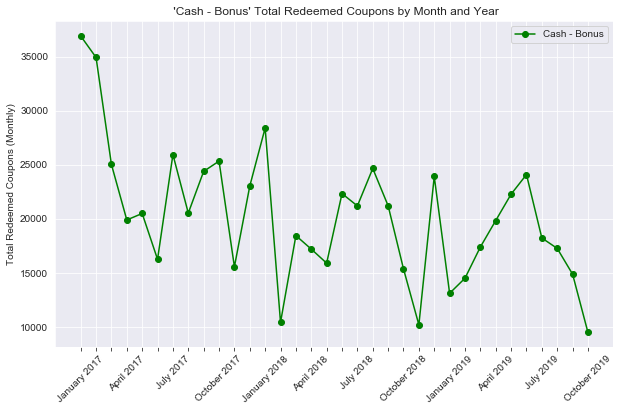

In [271]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Generate a new figure object
plt.figure(1, figsize = (10, 6))

## Plot the first type / subtype combination
plt.plot(x, y1, 'g-o', label = "Cash - Bonus")

## Change the y-label for better desriptive text
plt.ylabel("Total Redeemed Coupons (Monthly)")

## Set a descriptive title
plt.title(" 'Cash - Bonus' Total Redeemed Coupons by Month and Year")
## Set legend for first plot
plt.legend()

## Create an axes object for the next step
ax = plt.gca()

every_nth = 3
## Loop through the labels and only show every 4 months for easier readability
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

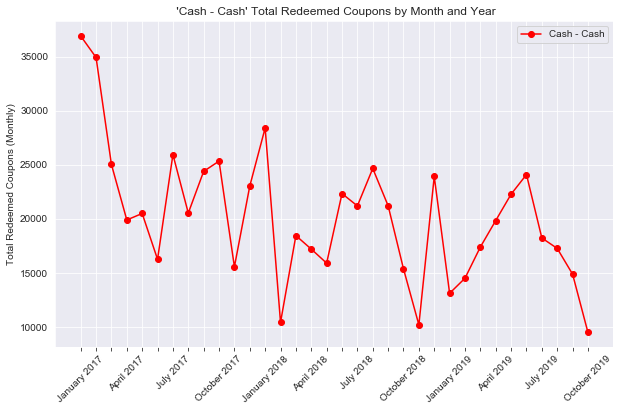

In [45]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the second type / subtype combination
plt.plot(x, y1, 'r-o', label = "Cash - Cash")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Cash' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

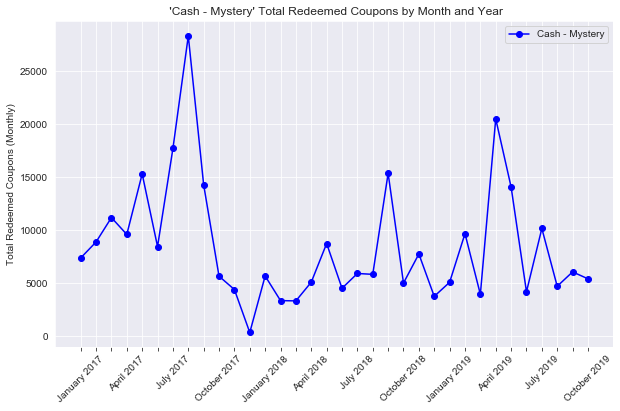

In [46]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the third type / subtype combination
plt.plot(x, y3, 'b-o', label = "Cash - Mystery")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Mystery' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## * What to make of this?  We see that cash rewards tend to follow the same pattern, and had a huge spike in redemptions starting in early 2017 and then coming right back down towards the end of the year.  However, none of those rewards reach the same level of activity again - what caused them to be so popular during that timeframe?

## Generate the next set of plots, for the remaining two coupon type & subtype combinations:

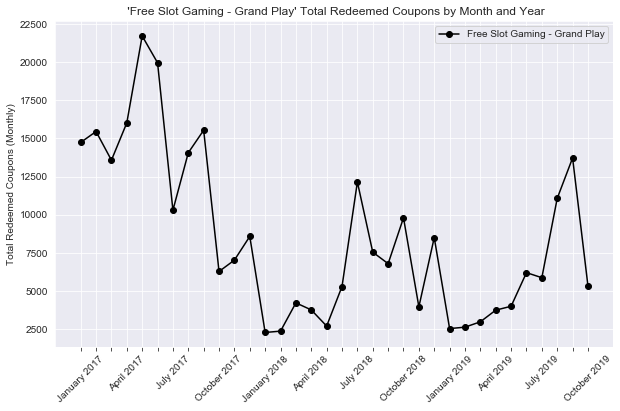

In [47]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the fourth type / subtype combination
plt.plot(x, y4, 'k-o', label = "Free Slot Gaming - Grand Play")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Free Slot Gaming - Grand Play' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

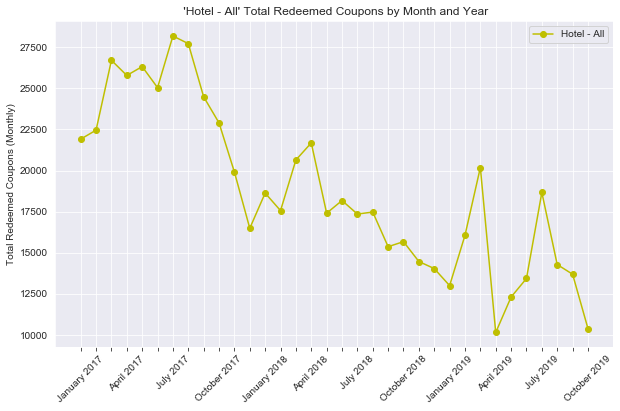

In [48]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(x, y5, 'y-o', label = "Hotel - All")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Hotel - All' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## * Similar activity for the other two type/subtype combinations... Increased usage throughout the first year but then it starts to drop dramatically.  Curious to see if this is not the case for all promotions, however.

In [49]:
## Add in casino information to see if there is a difference between the two

top_five_location_coupon_pivot_table = \
        pd.pivot_table(top_five_coupon_combinations, values = "Redemption Count", index = ["Month", "Year", "Casino Site"],
                            columns = ["Coupon Type / Subtype"], aggfunc = np.sum).reset_index()

In [50]:
top_five_location_coupon_pivot_table["Month (name)"] = \
        top_five_location_coupon_pivot_table["Month"].apply(lambda x: calendar.month_name[x])

## Combine month and year, then sort the table by year/month
top_five_location_coupon_pivot_table["Month & Year"] = top_five_location_coupon_pivot_table["Month (name)"] + " " + \
            top_five_location_coupon_pivot_table["Year"].astype(str)

## Sort the values by calendar year - and we should be done!
top_five_location_coupon_pivot_table.sort_values(by = ["Year", "Month"], inplace = True)

In [51]:
## Split out the first casino's redemption activity by using the Site ID = 1

top_five_casino_1 = \
        top_five_location_coupon_pivot_table[top_five_location_coupon_pivot_table["Casino Site"] == 1]

In [52]:
## Create a quick function to put all of the columns we want to plot into variables
## Separate each coupon type/subtype combination

casino_1_y1 = top_five_casino_1["Cash - Bonus"]
casino_1_y2 = top_five_casino_1["Cash - Cash"]
casino_1_y3 = top_five_casino_1["Cash - Mystery"]
casino_1_y4 = top_five_casino_1["Free Slot Gaming - Grand Play"]
casino_1_y5 = top_five_casino_1["Hotel - All"]

## Use the month and year for our x-axis
casino_1_x = top_five_casino_1["Month & Year"]

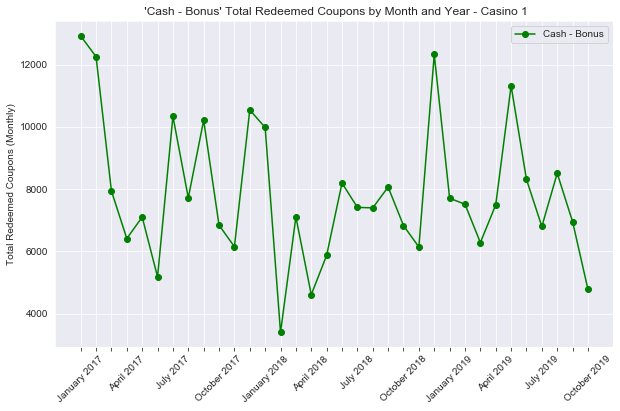

In [53]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the first type combination for Casino 1
plt.plot(casino_1_x, casino_1_y1, 'g-o', label = "Cash - Bonus")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Bonus' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

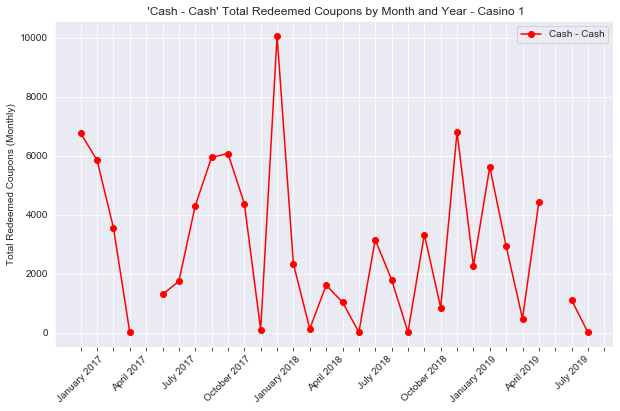

In [54]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the second type combination for Casino 1
plt.plot(casino_1_x, casino_1_y2, 'r-o', label = "Cash - Cash")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Cash' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

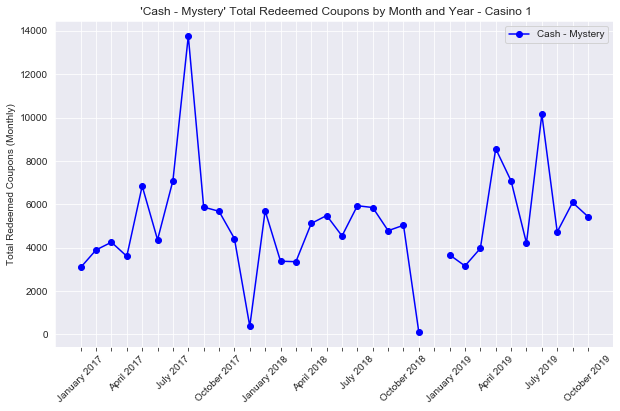

In [55]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the third type combination for Casino 1
plt.plot(casino_1_x, casino_1_y3, 'b-o', label = "Cash - Mystery")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Mystery' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

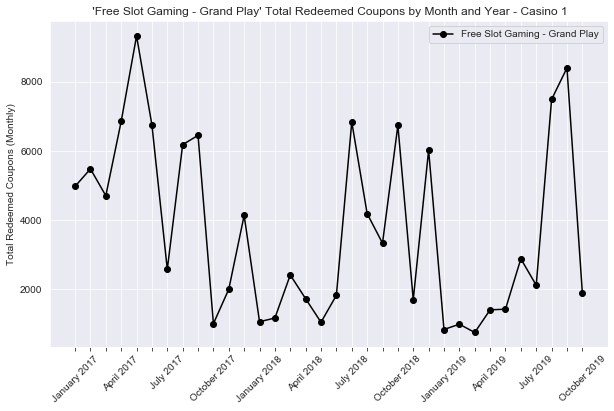

In [56]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the fourth type combination for Casino 1
plt.plot(casino_1_x, casino_1_y4, 'k-o', label = "Free Slot Gaming - Grand Play")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Free Slot Gaming - Grand Play' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

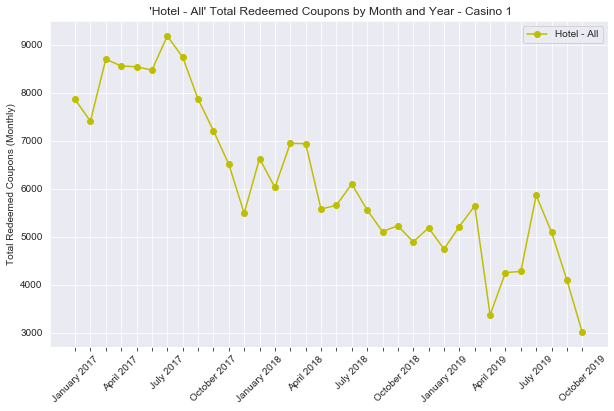

In [57]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the fifth type combination for Casino 1
plt.plot(casino_1_x, casino_1_y5, 'y-o', label = "Hotel - All")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Hotel - All' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## Perform similar steps for Casino 2; again, just to confirm our original observations about the seasonal nature of the coupon redemptions.

In [58]:
top_five_casino_2 = \
        top_five_location_coupon_pivot_table[top_five_location_coupon_pivot_table["Casino Site"] == 2]

In [59]:
## Create a quick function to put all of the columns we want to plot into variables
## Separate each coupon type/subtype combination

casino_2_y1 = top_five_casino_2["Cash - Bonus"]
casino_2_y2 = top_five_casino_2["Cash - Cash"]
casino_2_y3 = top_five_casino_2["Cash - Mystery"]
casino_2_y4 = top_five_casino_2["Free Slot Gaming - Grand Play"]
casino_2_y5 = top_five_casino_2["Hotel - All"]

## Use the month and year for our x-axis
casino_2_x = top_five_casino_2["Month & Year"]

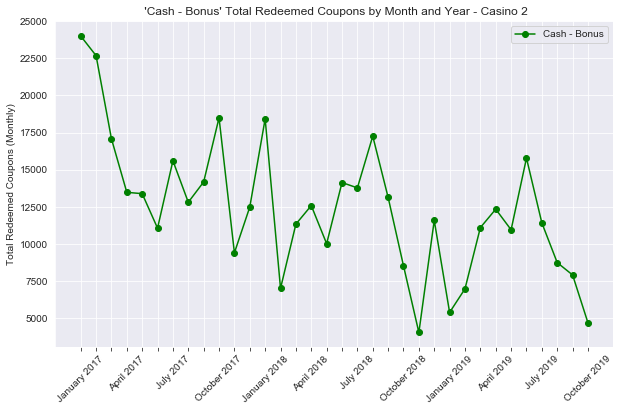

In [60]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the first type combination for Casino 2
plt.plot(casino_2_x, casino_2_y1, 'g-o', label = "Cash - Bonus")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Bonus' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

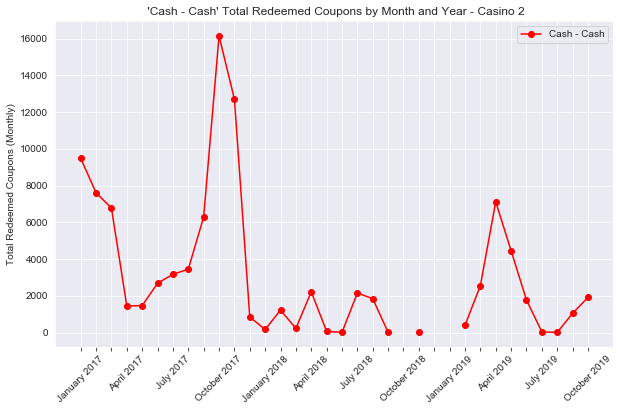

In [61]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the second type combination for Casino 2
plt.plot(casino_2_x, casino_2_y2, 'r-o', label = "Cash - Cash")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Cash' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

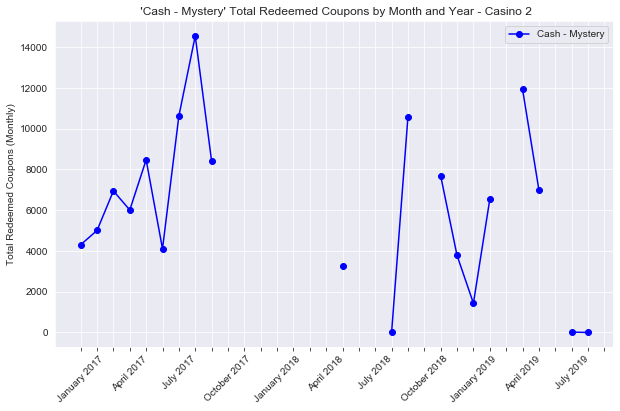

In [62]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the third type combination for Casino 2
plt.plot(casino_2_x, casino_2_y3, 'b-o', label = "Cash - Mystery")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Mystery' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

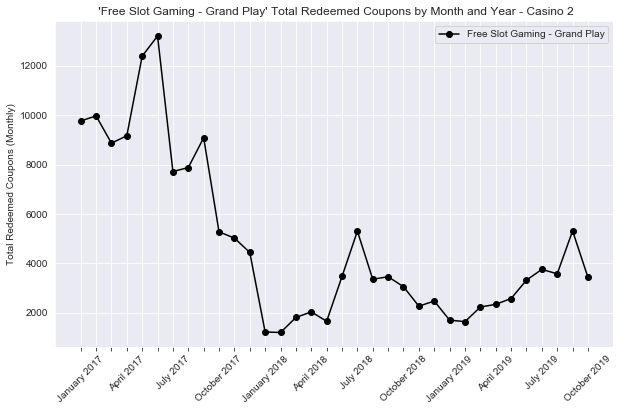

In [63]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the fourth type combination for Casino 2
plt.plot(casino_2_x, casino_2_y4, 'k-o', label = "Free Slot Gaming - Grand Play")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Free Slot Gaming - Grand Play' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

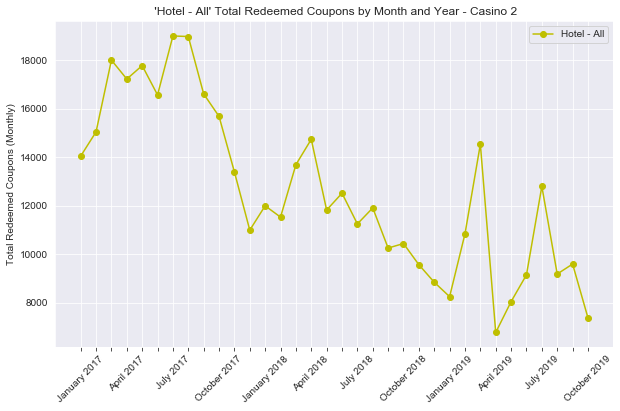

In [64]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the fifth type combination for Casino 2
plt.plot(casino_2_x, casino_2_y5, 'y-o', label = "Hotel - All")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Hotel - All' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## * These seasonal peaks generated an additional question for our group - does this happen across ALL coupons?  Do we see this seasonality fluctuation with ALL redeemed coupons, regardless of type?

In [65]:
## We come back to our original aggregation table - we can simplify this one a bit by doing another group by 
## on month and year and only selecting the Count field - irregardless of the coupon type

redeemed_coupon_aggregation.head()

,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count,Coupon Type / Subtype
0,1,2017,1,Cash,Bonus,12919,Cash - Bonus
1,1,2017,1,Cash,Cash,6753,Cash - Cash
2,1,2017,1,Cash,Mystery,3088,Cash - Mystery
3,1,2017,1,Event,Concert,2,Event - Concert
4,1,2017,1,Free Slot Gaming,Bonus,791,Free Slot Gaming - Bonus


In [66]:
## Start with making a copy of the dataframe, to not overwrite the original aggregation table
## This is best practice to ensure that this can be run from any environment/machine

all_coupon_redeemed_by_month_year_df = redeemed_coupon_aggregation.copy()

In [67]:
## Confirm dataframe length and head match the original and show the copied table

print("There are this many rows in the original dataframe: {}.".format(len(redeemed_coupon_aggregation)))
print()

print("There are this many rows in the new dataframe: {}.".format(len(all_coupon_redeemed_by_month_year_df)))
print()

all_coupon_redeemed_by_month_year_df.head()

There are this many rows in the original dataframe: 987.

There are this many rows in the new dataframe: 987.



,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count,Coupon Type / Subtype
0,1,2017,1,Cash,Bonus,12919,Cash - Bonus
1,1,2017,1,Cash,Cash,6753,Cash - Cash
2,1,2017,1,Cash,Mystery,3088,Cash - Mystery
3,1,2017,1,Event,Concert,2,Event - Concert
4,1,2017,1,Free Slot Gaming,Bonus,791,Free Slot Gaming - Bonus


In [70]:
## We start by renaming the columns to remove the original formatting from aggregating them together
## Then we drop the columns that we don't need


all_coupon_redeemed_by_month_year_df.columns = ["Month", "Year", "Casino", "Coupon Type", "Coupon Sub Type",
                                               "Coupons Redeemed (Count)", "Type / Subtype"]

all_coupon_redeemed_by_month_year_df = all_coupon_redeemed_by_month_year_df[["Month", 
                                                                            "Year", "Coupons Redeemed (Count)"]]

## Confirm that our transformations completed successfully by look at the first 10 rows
all_coupon_redeemed_by_month_year_df.head(10)

,Month,Year,Coupons Redeemed (Count)
0,1,2017,12919
1,1,2017,6753
2,1,2017,3088
3,1,2017,2
4,1,2017,791
5,1,2017,4977
6,1,2017,3
7,1,2017,3120
8,1,2017,7857
9,1,2017,3


In [71]:
## Group them by Month and Year to get a summarized count, and then we will be ready to plot!

all_redeemed_coupon_by_month_year_df = \
        all_coupon_redeemed_by_month_year_df.groupby(["Month", "Year"]) \
                        .agg({"Coupons Redeemed (Count)": "sum"}).reset_index()

all_redeemed_coupon_by_month_year_df.rename(columns = {"Coupons Redeemed (Count)": "Coupons Redeemed (Sum)"}, 
                                           inplace = True)

In [72]:
## A few more steps - we'll create a month label with the actual month name

all_redeemed_coupon_by_month_year_df["Month (name)"] = \
        all_redeemed_coupon_by_month_year_df["Month"].apply(lambda x: calendar.month_name[x])

## Combine month and year, then sort the table by year/month
all_redeemed_coupon_by_month_year_df["Month & Year"] = all_redeemed_coupon_by_month_year_df["Month (name)"] + " " + \
            all_redeemed_coupon_by_month_year_df["Year"].astype(str)

## Sort the values by calendar year - and we should be done!
all_redeemed_coupon_by_month_year_df.sort_values(by = ["Year", "Month"], inplace = True)

In [73]:
## Show the first five rows to confirm the final table is ready
all_redeemed_coupon_by_month_year_df.head()

,Month,Year,Coupons Redeemed (Sum),Month (name),Month & Year
0,1,2017,118336,January,January 2017
3,2,2017,123263,February,February 2017
6,3,2017,109829,March,March 2017
9,4,2017,98263,April,April 2017
12,5,2017,117856,May,May 2017


In [74]:
## Use the sum of redeemed coupons for our y-axis
all_redeemed_coupons_y = all_redeemed_coupon_by_month_year_df["Coupons Redeemed (Sum)"]

## Use the month and year for our x-axis
all_redeemed_coupons_x = all_redeemed_coupon_by_month_year_df["Month & Year"]

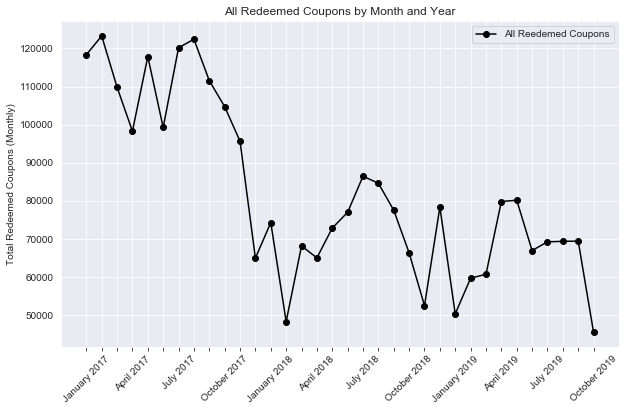

In [75]:
sns.set_style("darkgrid")

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(all_redeemed_coupons_x, all_redeemed_coupons_y, 'k-o', label = "All Reedemed Coupons")

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title("All Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## * Almost perfectly mirrors some of our earlier observations/plots.  It's pretty fascinating to see - what could have lead to such a precipitous drop?  
## * This is a takeaway/question for our business partners at MLCV.

# <span style="color:#ffcc33">MCLV Exploratory Analytics - Python Part II.</span>

In [24]:
## Look at our original fact table again, to help determine what fields are available for analysis

redeemed_coupon_df.head()

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,...,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType,Date,Month,Year
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2017-01-01,1,2017
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,...,Other,O,Other,c,New Member,N,Not Applicable,2017-01-01,1,2017


In [25]:
## Let's see what values we have for the "TargetPop" field in the fact table

redeemed_coupon_df["TargetPop"].unique()

array(['VIP', 'Not Applicable', 'New Member', 'Loyalty', 'Inactive',
       'Appointment Marketing', 'Retail'], dtype=object)

In [26]:
## Now we just group by the Target Population to get counts of redemptions
## We don't save it as a variable because it's just a quick table to take a look
## Right off the bat we notice that 

redeemed_coupon_targetpop_aggregate_df = \
        redeemed_coupon_df.groupby(["TargetPop"]) \
            .agg({"RedeemCount": ["sum"]}).reset_index() \
            .sort_values(by = ("RedeemCount", "sum"), ascending = False)

In [27]:
## Rename the columns to terms that are easier to intrepret

redeemed_coupon_targetpop_aggregate_df.columns = ["Target Population", "Total Redeemed Coupons"]

In [28]:
## Show the total number of redeemed coupons for the entire data set

total_redeemed_coupons = redeemed_coupon_df.RedeemCount.sum()

print("The total number of redeemed coupons is {}.".format(total_redeemed_coupons))

The total number of redeemed coupons is 2789901.


In [29]:
## Create a new column to show the overall % of redeemed coupons
## Vast majority of our redeemed coupons belong to a group that doesn't have a category
## And looking at these counts, there's very little information to gleam

redeemed_coupon_targetpop_aggregate_df["% of Overall Redeemed Coupons"] = \
            redeemed_coupon_targetpop_aggregate_df["Total Redeemed Coupons"] / total_redeemed_coupons * 100

In [30]:
HTML(redeemed_coupon_targetpop_aggregate_df.to_html(index=False))

Target Population,Total Redeemed Coupons,% of Overall Redeemed Coupons
Not Applicable,2008356,71.986640
Loyalty,513756,18.414847
Inactive,79069,2.834115
VIP,75767,2.715759
New Member,58283,2.089071
Appointment Marketing,54157,1.941180
Retail,513,0.018388


## We will create four new tables - by subsetting on four target populations

- Not Applicable
- Loyalty
- VIP
- New Member

In [31]:
## Create four new tables to make the analysis easier and faster
## Subset on the target populations we want to investigate further

not_applicable_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "Not Applicable"]
loyalty_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "Loyalty"]
vip_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "VIP"]
new_member_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "New Member"]

In [32]:
## Since we're going to do same manipulation four times, let's put it in a function
## When first building these set of analyses, we iterated through them to get the right format
## Once we finalized the final structure of the table, putting it in a function makes it easy to run
## on the four different tables we want to run it against

def build_target_aggregate_table(df):
    
    ## Summarize all redeemed coupons - to use in a calculation down below
    total_redeemed_coupons = redeemed_coupon_df.RedeemCount.sum()
    
    ## Rename the columns for easier readability
    target_col_names = ["Casino Location", "Coupon Type", "Coupon Sub Type","Total Redeemed Coupons"]
    
    ## Take the input dataframe, and group by the Casino Site, Coupon Type, Coupon Sub Type
    ## Summarize the RedeemCount column to get the total number of redemptions
    ## Sort the values by the summarized column in descending order
    df = \
        df.groupby(["SiteID", "TypeDescription", "SubTypeDescription"]) \
            .agg({"RedeemCount": ["sum"]}).reset_index() \
            .sort_values(by = ("RedeemCount", "sum"), ascending = False)
    
    ## Change the column names to the list above
    df.columns = target_col_names
    
    ## Create a new column showing the percentage based on the total number of redeemed coupons
    df["% of Overall Redeemed Coupons"] = \
            round(df["Total Redeemed Coupons"] / total_redeemed_coupons * 100, 2)
    
    ## Sort the dataframe again, in descending order, but also by casino location to put them together
    df.sort_values(by = ["Casino Location", "Total Redeemed Coupons"], ascending = False, inplace = True)
    
    ## Return the completed dataframe in a much nicer format
    return HTML(df.head(30).to_html(index=False))

In [33]:
build_target_aggregate_table(not_applicable_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Cash,Bonus,402460,14.43
2,Cash,Mystery,120687,4.33
2,Free Slot Gaming,Grand Play,116959,4.19
2,Hotel,HK,106635,3.82
2,Cash,Cash,97032,3.48
2,Hotel,All,90189,3.23
2,POS,Food,39858,1.43
2,Gift,Other,32318,1.16
2,Other,Other,21668,0.78
2,Points,Match Point,17871,0.64


## Here we see, for the "Not Applicable" target population and the top 30 type / subtype combinations, with most going to Cash, Free Slot Gaming, and Hotel.

In [34]:
## Show the analysis/table for Loyalty population

build_target_aggregate_table(loyalty_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Hotel,All,318619,11.42
2,Hotel,HK,20573,0.74
2,Cash,Bonus,7131,0.26
2,Hotel,ML,2266,0.08
2,Cash,Other,153,0.01
2,Hotel,Eddy's,26,0.00
2,POS,Food,5,0.00
2,Free Table Gaming,Free Play,1,0.00
1,Hotel,All,154889,5.55
1,Hotel,ML,7544,0.27


## The "Loyalty" targeted population overwhelmingly used hotel points or redeemed coupons at the hotels on site.

In [35]:
## Show the analysis/table for "VIP" population

build_target_aggregate_table(vip_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Free Slot Gaming,Grand Play,10142,0.36
2,Gift,Other,9945,0.36
2,Hotel,HK,4800,0.17
2,Points,Other,4509,0.16
2,Event,Dinner,2440,0.09
2,Hotel,All,2236,0.08
2,Cash,Cash,411,0.01
2,Event,Concert,396,0.01
2,Event,Drawing,216,0.01
2,Hotel,ML,26,0.00


## The "VIP" targeted population seemed to favor the gifts or free slot gaming.

In [36]:
## Show the analysis/table for "New Members"

build_target_aggregate_table(new_member_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Other,Other,53423,1.91
2,Free Slot Gaming,Grand Play,1783,0.06
2,Cash,Cash,1778,0.06
2,Event,Concert,124,0.00
2,POS,Food,4,0.00
1,Cash,Cash,633,0.02
1,Free Slot Gaming,Grand Play,442,0.02
1,POS,Food,63,0.00
1,Hotel,ML,31,0.00
1,Hotel,Eddy's,2,0.00


## Our "New Member" target population seems to favor "Other" coupon types, followed by "Free Slot Gaming" and "Cash".

# We're ready to move on to looking at Player attributes.  To do this, we'll bring in the Player dimension.

## We start with just the Player dim for a few reasons:

- This is the only place where we have some attributes related to the player aside from the ID.
- Bringing in the other facts or dimensions will just populate the table with missing values
- We can do an analysis over the whole population, determine what groups stand out, and then go back to the fact to get more information about them.

In [37]:
## Load in the "Player Day" table - just do it in one shot

player_dim_df = pd.read_csv(team_folder+player_dim, low_memory = False, encoding = "cp1252")

In [38]:
## Go through similar steps of looking at the overall structure of the table
## See some of the summary statistics
## Determine if any additional clean-up work is required

len(player_dim_df)

397643

In [39]:
## Look at the column names

player_dim_df.columns

Index(['PrimaryPropertyID', 'PrimaryPropertyName', 'PlayerID', 'City', 'State',
       'ZipCode', 'TierID', 'TierName', 'DistFromML', 'DistFromHK',
       'LastPlayDate', 'Description', 'BirthMonth', 'BirthYear',
       'PlayerStatus', 'Prison Flag', 'Deceased Flag', 'DMA Flag',
       'Person #  Marital Status', 'Estimated Current Home Value',
       'Children  Presence of Children 0-18',
       'DSE  Discretionary Spend Estimate', 'Est  Household Income V6',
       'PIQ Match Type', 'NCOA MOVE DATE', 'NCOA Move Type'],
      dtype='object')

In [40]:
## Observe the first five rows to see the structure of the table

player_dim_df.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,Deceased Flag,DMA Flag,Person # Marital Status,Estimated Current Home Value,Children Presence of Children 0-18,DSE Discretionary Spend Estimate,Est Household Income V6,PIQ Match Type,NCOA MOVE DATE,NCOA Move Type
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Married Extremely Likely,250300,Not as Likely to have a child,17831,138,Individual Match,NaN,Did Not Move
1,1,Grand Casino ML,10014,GARFIELD,MN,56332,25,Preferred,89.0,126.0,...,No,No,Married Extremely Likely,275300,Not Likely to have a child,16028,36,Individual Match,NaN,Did Not Move
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Unknown Scored,256800,Not Likely to have a child,27864,18,Individual Match,NaN,Did Not Move
3,1,Grand Casino ML,10063,TALMOON,MN,56637,25,Preferred,104.0,115.0,...,No,No,Married Extremely Likely,0,Not Likely to have a child,16742,49,Individual Match,NaN,Did Not Move
4,1,Grand Casino ML,10187,PEQUOT LAKES,MN,56472,25,Preferred,51.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Right off the bat, we notice there is no "Age" column.  So we will have to generate one ourselves.

## We can also choose to focus only on columns that are required for our population analysis.  Let's include:

- PrimaryPropertyName
- City
- State
- ZipCode
- TierName
- LastPlayDate
- BirthMonth / BirthYear
- Person #  Marital Status
- Est Household Income V6
- Children  Presence of Children 0-18
- Person #  Marital Status

In [41]:
## Since these column names aren't very descriptive, we're going to modify them too

## There's an extra space in the Est  Household Income column!  What fun it was to debug that!!!!!
## Pull out on the columns we need
player_columns_to_include = \
    ["PrimaryPropertyName", "City", "State", "ZipCode", "TierName", "LastPlayDate", "BirthMonth", "BirthYear",
             "Person #  Marital Status", "Est  Household Income V6", "Children  Presence of Children 0-18",
     "Person #  Marital Status"]

new_col_names = ["Casino Site", "City", "State", "Zip Code", "Player Tier", "Last Gamble Date", "Month", "Year",
                    "Marital Status", "EstimatedHousehold Income", "No. of Dependents", "Marital Status"]

## Subset the player information based on the selected columns
player_dim_df_subset = player_dim_df[player_columns_to_include]

## Give the subsetted dataframe better/more descriptive column names
player_dim_df_subset.columns = new_col_names

In [42]:
## Show the first five rows of the new cleaned up table

player_dim_df_subset.head(5)

,Casino Site,City,State,Zip Code,Player Tier,Last Gamble Date,Month,Year,Marital Status,EstimatedHousehold Income,No. of Dependents,Marital Status
0,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-16 18:40:18.000,7,1961,Married Extremely Likely,138,Not as Likely to have a child,Married Extremely Likely
1,Grand Casino ML,GARFIELD,MN,56332,Preferred,2019-10-24 07:22:04.000,9,1935,Married Extremely Likely,36,Not Likely to have a child,Married Extremely Likely
2,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-23 07:46:00.000,10,1938,Unknown Scored,18,Not Likely to have a child,Unknown Scored
3,Grand Casino ML,TALMOON,MN,56637,Preferred,2019-09-29 09:41:27.000,12,1951,Married Extremely Likely,49,Not Likely to have a child,Married Extremely Likely
4,Grand Casino ML,PEQUOT LAKES,MN,56472,Preferred,2019-06-27 21:50:12.000,7,1964,NaN,NaN,NaN,NaN


## Here we perform our first transformation of this table and transform the Month/Year columns in a format that will allow us to calculate Age

In [43]:
player_dim_df_subset["Birth Date"] = \
        player_dim_df_subset["Month"].astype(str) + "-" + player_dim_df_subset["Year"].astype(str)

In [44]:
## Custom function to get the birth month and year in right format needed to perform our Age calculation

player_dim_df_subset["Birth Date"] = \
        player_dim_df_subset["Birth Date"].apply(lambda x: dt.datetime.strptime(x, "%m-%Y"))

In [45]:
## Create a variable for today's date

today = dt.datetime.today()

## Create the Age column by performing a few steps
## Use the today variable to subtract the birth date column
## Transform the calculation to days and divide by 365.25 to account for leap years - and output a rounded
player_dim_df_subset["Age"] = \
        round((today - player_dim_df_subset["Birth Date"]).apply(lambda x: x.days) / 365.25, 0).astype(int)

In [46]:
## Confirm our transformation was successful by showing the first 5 rows

player_dim_df_subset.Age.head(5)

0    58
1    84
2    81
3    68
4    55
Name: Age, dtype: int32

In [47]:
## Anyone below the age of 18 is automatically ruled out - they are ILLEGAL
## There's only four instances of these players - we'll just scrap them for this analysis

player_dim_df_subset.groupby("Age").agg({"State": "count"}).head(6)

,State
Age,
-5176,1
-3173,1
-2174,1
-399,1
18,535
19,3309


In [50]:
## To smooth out th

player_dim_df_subset.groupby("Age").agg({"State": "count"}).tail(16)

,State
Age,
120,65
123,1
124,1
143,1
144,1
146,1
161,2
163,1
164,1


## A few observations on the Age column.  Likely due to the information in the "Year" column in the dimension, we are seeing some strange Ages, a few negative values (meaning some of the gamblers haven't been born yet) and some very very large Age outliers, means we will take these values out prior to doing the histogram of Ages.

## 120 has 64 players so this is where we will set the cut off.

In [51]:
mininum_year = player_dim_df_subset.Year.min()
maximum_year = player_dim_df_subset.Year.max()

print("The year furthest back in the data set is {}.  Therefore any players that contain years around this will have a very old age and should be removed."\
     .format(mininum_year))

print()

print("The year closest to present in the data set is {}.  Therefore any players that contain years around this will be younger than the legal limit of casinos of 18 and can be removed"\
     .format(maximum_year))

The year furthest back in the data set is 1798.  Therefore any players that contain years around this will have a very old age and should be removed.

The year closest to present in the data set is 7196.  Therefore any players that contain years around this will be younger than the legal limit of casinos of 18 and can be removed


In [52]:
## Filter on the strange Ages to remove them before our first analysis, where having a clean distribution helps

player_dim_df_subset = \
        player_dim_df_subset[(player_dim_df_subset.Age > 0) & (player_dim_df_subset.Age <= 120)]

In [53]:
## Show the two unique casino sites so we know what to subset

player_dim_df_subset["Casino Site"].unique()

array(['Grand Casino ML', 'Grand Casino HK'], dtype=object)

In [54]:
## Create a player dimensio for each Casino

grand_casino_ml_player_dim = \
    player_dim_df_subset[player_dim_df_subset["Casino Site"] == "Grand Casino ML"]

grand_casino_hk_player_dim = \
    player_dim_df_subset[player_dim_df_subset["Casino Site"] == "Grand Casino HK"]

In [55]:
## Bring in some statistical packages to add a normal curve to the data set

from scipy.stats import norm

## Grab the first column we will use to plot

ml_casino_age = grand_casino_ml_player_dim["Age"]
hk_casino_age = grand_casino_hk_player_dim["Age"]

## We build two different versions of the Age plots, one with the a normal curve on top
## And one without

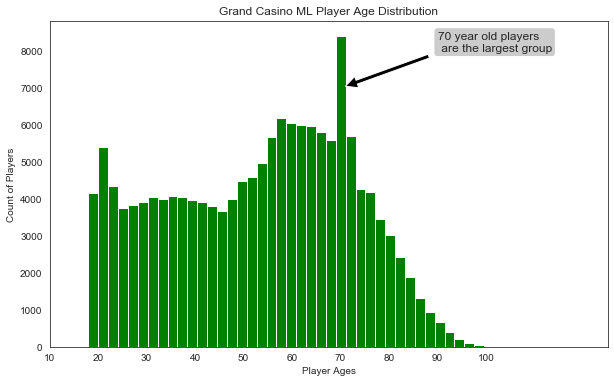

In [56]:
sns.set_style("white")

plt.figure(figsize= (10, 6))

## Plot Age Distribution for Grand Casino ML
plt.hist(ml_casino_age, 50, color = 'g')

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 110, step = 10))

## Add more descriptive labels
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

plt.annotate("70 year old players\n are the largest group", 
           xy = (70.0, 7000.0),
        xytext = (90.0, 8000.0),
      size = 12,
     bbox = dict(boxstyle="round", fc="0.8"),
       arrowprops=dict(facecolor="black", shrink = 0.05))

## Add a descriptive title
plt.title("Grand Casino ML Player Age Distribution")

## Show the beautiful graph!
plt.show()

## Let's print the average and median ages for the Grand Casino ML population, so we have it as a reference point.

In [63]:
## We'll use round to the whole number since this is Age
print()
print("The average age of a player in Grand Casino ML is {}.".format(ml_casino_age.mean().astype(int)))
print()
print("The median age of a player in Grand Casino ML is {}.".format(ml_casino_age.median().astype(int)))


The average age of a player in Grand Casino ML is 52.

The median age of a player in Grand Casino ML is 55.


## We pull in a special plot from the seaborn library known as `distplot`.  This allows us to include a normal distribution overlaid the histogram above.

## The y-axis is the probability density function for the kernel density estimation.  However, this is the probability density and <i> not </i> a probability.

## It is helpful for relative comparison between the different buckets of Age.

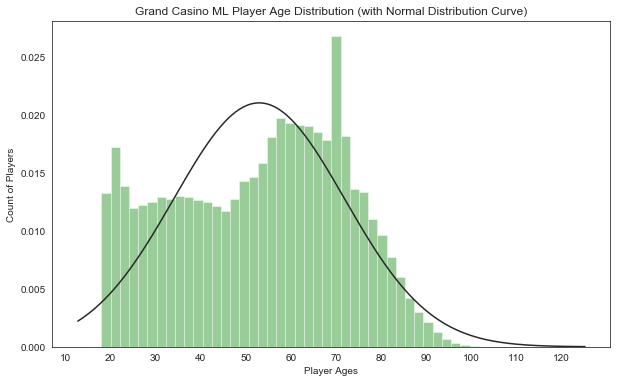

In [64]:
## Import a normal distribution from scipy
from scipy.stats import norm

## Build a new plot
plt.figure(1, figsize=(10, 6))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(ml_casino_age, hist = True, fit = norm, kde = False, norm_hist = True,
             bins = 50, color = "green")

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Set better labels for the graph
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Age Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

## Now we plot the Age distribution for the Grand Casino HK population

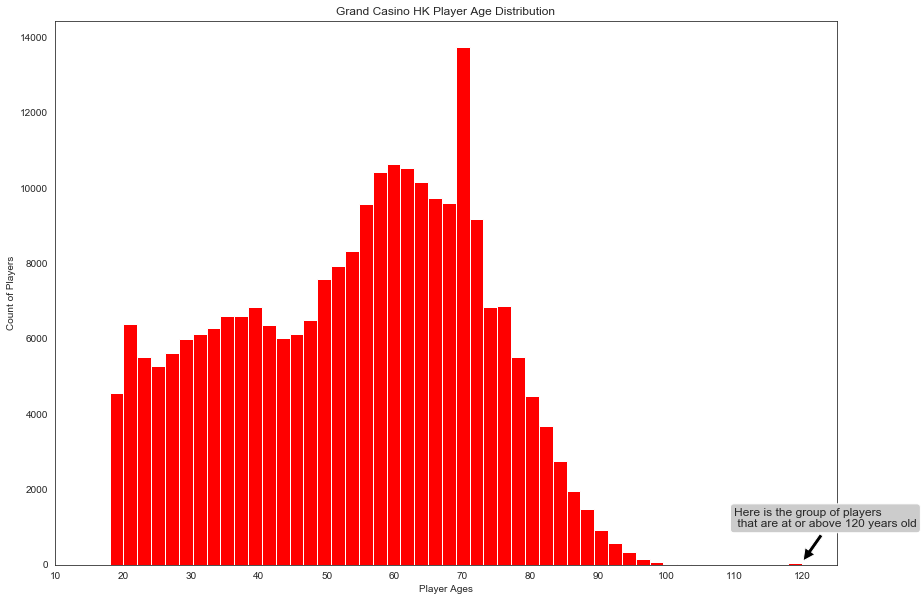

In [70]:
## Create a new plot figure
plt.figure(figsize= (14, 10))

## Plot Age Distribution for Grand Casino HK
plt.hist(hk_casino_age, 50, color = 'r')

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Add more descriptive labels
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

plt.annotate("Here is the group of players\n that are at or above 120 years old", 
            xy = (120.0, 60.0),
          xytext = (110.0, 1000.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(facecolor="black", shrink = 0.05))

## Add a descriptive title
plt.title("Grand Casino HK Player Age Distribution")

## Show the beautiful graph!
plt.show()

In [71]:
## We'll use round to the whole number since this is Age
print()
print("The average age of a player in Grand Casino ML is {}.".format(hk_casino_age.mean().astype(int)))
print()
print("The median age of a player in Grand Casino ML is {}.".format(hk_casino_age.median().astype(int)))


The average age of a player in Grand Casino ML is 53.

The median age of a player in Grand Casino ML is 56.


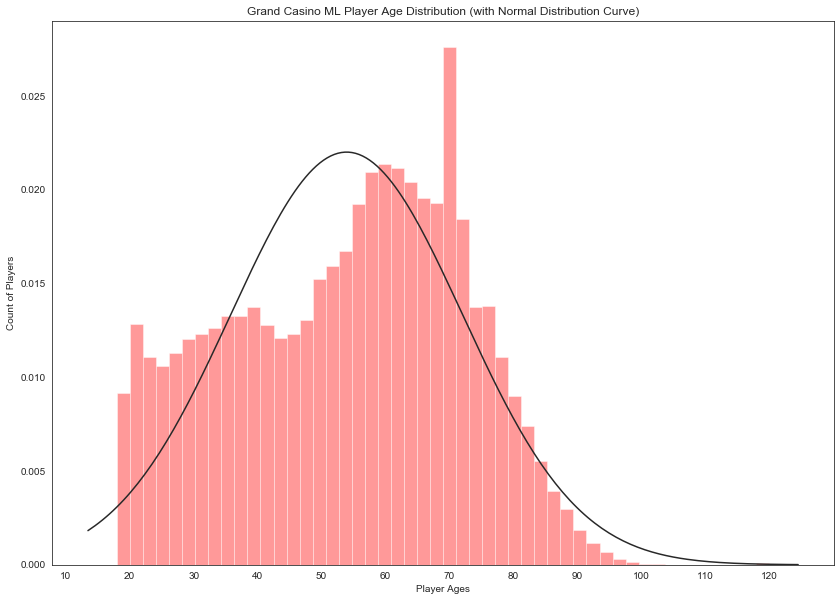

In [73]:
## Build a new plot - slightly changing the dimensions
plt.figure(1, figsize=(14, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(hk_casino_age, fit = norm, kde = False, 
             bins = 50, color = "red")

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Set better labels for the graph
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Age Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

## Next, we'll do a histogram of the estimated household income field

In [74]:
## Remove NA values from the income field as a first step to clean up

ml_casino_income = grand_casino_ml_player_dim["EstimatedHousehold Income"].dropna()

hk_casino_income = grand_casino_hk_player_dim["EstimatedHousehold Income"].dropna()

In [75]:
## In these steps, we're subsetting the data to only include Income values that are digit or numeric
## We noticed that there were a lot of values that did not fit in that structure
## We only want to plot legitimate values - so we subset them first and then convert them to integer

ml_casino_income = ml_casino_income[ml_casino_income.str.isdigit()]

ml_casino_income = ml_casino_income.astype(int)

hk_casino_income = hk_casino_income[hk_casino_income.str.isdigit()]

hk_casino_income = hk_casino_income.astype(int)

In [76]:
## Here we confirm that our transformation was successful

print(ml_casino_income.groupby(ml_casino_income).count().head())
print()
print(ml_casino_income.groupby(ml_casino_income).count().tail())

EstimatedHousehold Income
6     449
7     495
8     521
9     636
10    751
Name: EstimatedHousehold Income, dtype: int64

EstimatedHousehold Income
23647    1
24024    1
24286    1
24653    1
24981    1
Name: EstimatedHousehold Income, dtype: int64


In [77]:
## Create some buckets to better plot the distribution of estimated household income
## The spread of values is quite significant

slices = [15, 20, 30, 40, 50, 60, 70, 80, 100, 110, 120, 150, 200, 250, 300, 350, 400, 450, 500,
    550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1300, 1500, 1700, 1900,
    2000, 3000, 4000, 5000, 6000, 25500]

## Save the sliced up income to a variable
income_dissected = pd.cut(ml_casino_income, slices)

In [78]:
## Save the sliced up income to a variable

income_dissected.value_counts(sort = False)

(15, 20]          4052
(20, 30]          7718
(30, 40]          9267
(40, 50]         10453
(50, 60]          8021
(60, 70]         12211
(70, 80]          9077
(80, 100]        14980
(100, 110]        3464
(110, 120]        6063
(120, 150]        8202
(150, 200]        4816
(200, 250]        3551
(250, 300]           0
(300, 350]           0
(350, 400]           0
(400, 450]           0
(450, 500]           0
(500, 550]           0
(550, 600]           0
(600, 650]           0
(650, 700]           0
(700, 750]           0
(750, 800]           0
(800, 850]           0
(850, 900]           0
(900, 950]           0
(950, 1000]          0
(1000, 1100]         0
(1100, 1300]         0
(1300, 1500]         0
(1500, 1700]         0
(1700, 1900]         0
(1900, 2000]         0
(2000, 3000]         0
(3000, 4000]         0
(4000, 5000]         0
(5000, 6000]         1
(6000, 25500]       55
Name: EstimatedHousehold Income, dtype: int64

## What an interesting observation on the incomes!  There is a large gap between the household incomes below $250K a year and above that line - and only 56 observations with household income above 6M a year.

## So we will subset this dataset one more time for household incomes below $250K.

In [79]:
## Subset the incomes below $250000

ml_casino_income_below_250 = ml_casino_income[ml_casino_income < 250]

hk_casino_income_below_250 = hk_casino_income[hk_casino_income < 250]

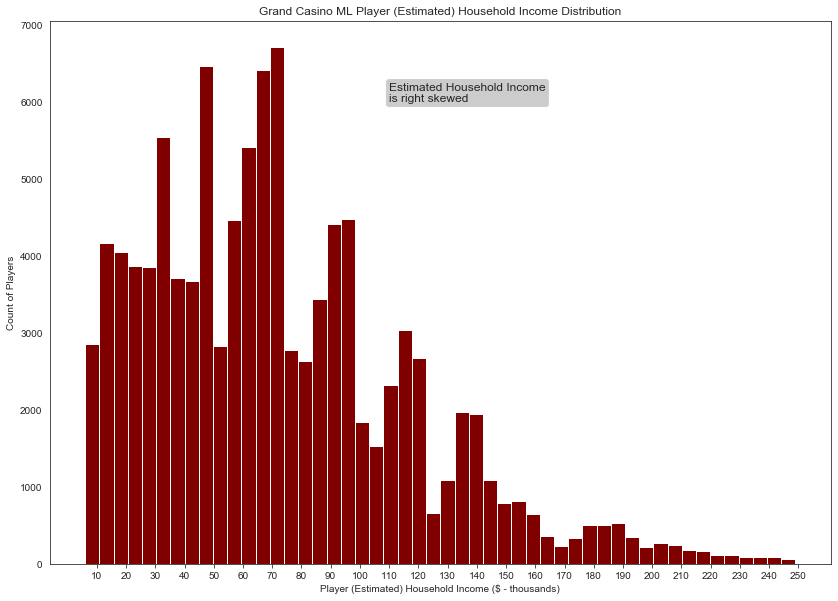

In [93]:

## Create a new plot figure
plt.figure(figsize= (14, 10))

## Plot Esimated Household Income Distribution for Grand Casino HK
plt.hist(ml_casino_income_below_250, 50, color = 'maroon')

plt.xticks(np.arange(10, 260, step = 10))

plt.tick_params(bottom = True)

## Set better labels for the graph
plt.xlabel("Player (Estimated) Household Income ($ - thousands)")
plt.ylabel("Count of Players")

plt.annotate("Estimated Household Income\nis right skewed", 
            xy = (120.0, 60.0),
          xytext = (110.0, 6000.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"))

## Set a title for the plot
plt.title("Grand Casino ML Player (Estimated) Household Income Distribution")

## Show the plot
plt.show()

## Generate the distribution of estimated household income for players at Grand Casino ML with a "normal" curve

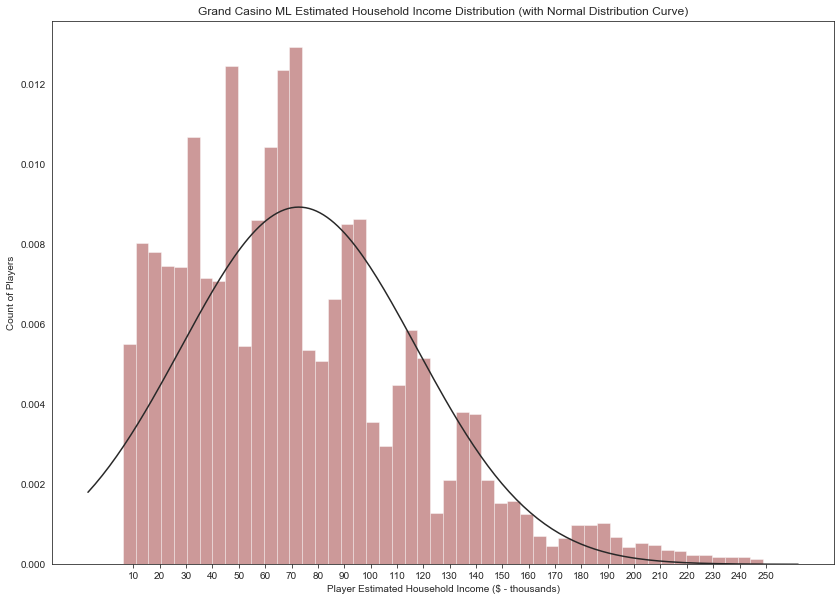

In [91]:
# Create a new plot figure
plt.figure(figsize= (14, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(ml_casino_income_below_250, fit = norm, kde = False, color = "maroon")

plt.xticks(np.arange(10, 260, step = 10))

plt.tick_params(bottom = True)

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Estimated Household Income Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

In [96]:
## Display the same summary statistics 

print()
print("The average (estimated) household income of a player in Grand Casino ML is ${},000.".format( \
                ml_casino_income_below_250.mean().astype(int)))
print()
print("The median (estimated) household income of a player in Grand Casino ML is ${},000.".format( \
                ml_casino_income_below_250.median().astype(int)))


The average (estimated) household income of a player in Grand Casino ML is $72,000.

The median (estimated) household income of a player in Grand Casino ML is $67,000.


## Generate a distribution plot for estimated household income for players at Grand Casino HK

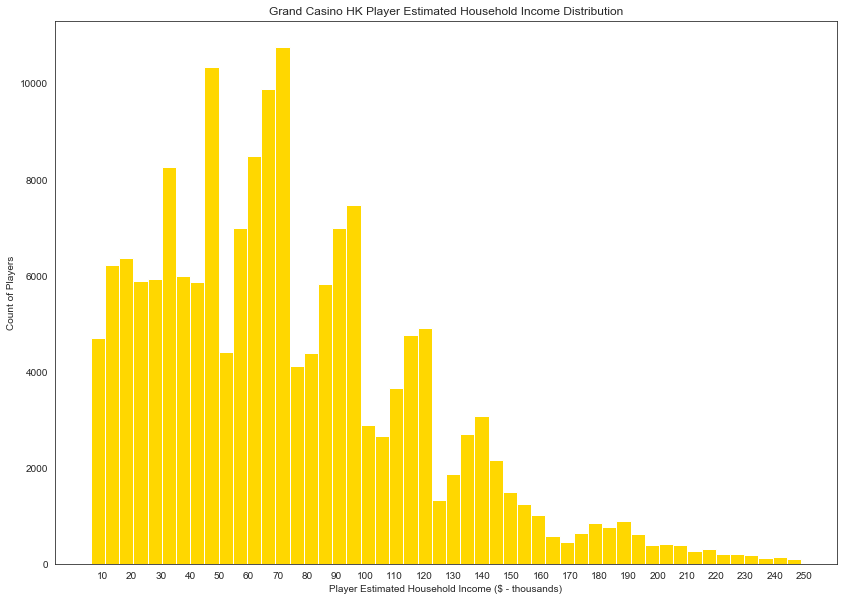

In [94]:
## Create a new plot figure
plt.figure(figsize= (14, 10))

## Plot the first three type / subtype combinations
plt.hist(hk_casino_income_below_250, 50, color = 'gold')

plt.xticks(np.arange(10, 260, step = 10))

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino HK Player Estimated Household Income Distribution")

## Show the plot
plt.show()

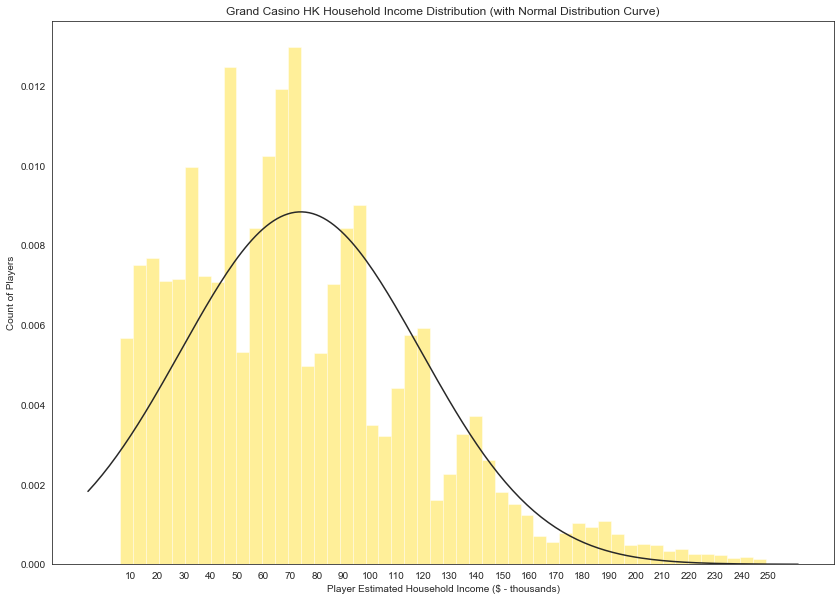

In [99]:
## Create a new plot figure
plt.figure(figsize= (14, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(hk_casino_income_below_250, fit = norm, kde = False, color = "gold")

plt.xticks(np.arange(10, 260, step = 10))

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino HK Household Income Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

In [98]:
print()
print("The median (estimated) household income of a player in Grand Casino ML is ${},000.".format( \
                hk_casino_income_below_250.mean().astype(int)))
print()
print("The median (estimated) household income of a player in Grand Casino ML is ${},000.".format( \
                hk_casino_income_below_250.median().astype(int)))


The median (estimated) household income of a player in Grand Casino ML is $73,000.

The median (estimated) household income of a player in Grand Casino ML is $68,000.


# Normally, we would be completing our journey here. 

# However, we want to take a look at the distributions of players by their tier status to see if there's any patterns to be observed.

In [100]:
## Show the length of the original dataframes for the player dim and coupon fact

print(len(player_dim_df_subset))

print()

print(len(coupon_fact_df))

397620

2777358


In [101]:
## Confirm we don't have any "strange" Ages in the dataframe

player_ages = player_dim_df_subset.Age

print(min(player_ages))
print()

print(max(player_ages))

## Show the first few lines of the dataframe

player_dim_df_subset.head()

18

120


,Casino Site,City,State,Zip Code,Player Tier,Last Gamble Date,Month,Year,Marital Status,EstimatedHousehold Income,No. of Dependents,Marital Status,Birth Date,Age
0,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-16 18:40:18.000,7,1961,Married Extremely Likely,138,Not as Likely to have a child,Married Extremely Likely,1961-07-01 00:00:00,58
1,Grand Casino ML,GARFIELD,MN,56332,Preferred,2019-10-24 07:22:04.000,9,1935,Married Extremely Likely,36,Not Likely to have a child,Married Extremely Likely,1935-09-01 00:00:00,84
2,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-23 07:46:00.000,10,1938,Unknown Scored,18,Not Likely to have a child,Unknown Scored,1938-10-01 00:00:00,81
3,Grand Casino ML,TALMOON,MN,56637,Preferred,2019-09-29 09:41:27.000,12,1951,Married Extremely Likely,49,Not Likely to have a child,Married Extremely Likely,1951-12-01 00:00:00,68
4,Grand Casino ML,PEQUOT LAKES,MN,56472,Preferred,2019-06-27 21:50:12.000,7,1964,NaN,NaN,NaN,NaN,1964-07-01 00:00:00,55


In [102]:
## Group the dataframe by Player Tier and Age to build a histogram

player_tier_age_count_df = \
            player_dim_df_subset.groupby(["Player Tier", "Age"]).agg({"Month": "count"}).reset_index()

## Rename our "count" column so that the table makes more sense
player_tier_age_count_df.rename(columns = {"Month": "Player Count"}, inplace = True)

## Sort by count to see what our biggest Player Tier and Age Group combinations are
player_tier_age_count_df.sort_values("Player Count", ascending = False, inplace = True)

## Show the first 5 rows of the new dataframe
player_tier_age_count_df.head(20)

,Player Tier,Age,Player Count
359,Preferred,59,7488
358,Preferred,58,7481
362,Preferred,62,7391
360,Preferred,60,7321
357,Preferred,57,7320
363,Preferred,63,7293
361,Preferred,61,7260
356,Preferred,56,7007
364,Preferred,64,6951
365,Preferred,65,6929


In [104]:
## Sort the values of the dataframe by Age, to save us this step on all the subsequent dataframes

player_tier_age_count_df.sort_values(by = "Age", inplace = True)

In [105]:
## See what unique player tiers we have

player_tier_age_count_df["Player Tier"].unique()

array(['Preferred', 'Associate Gaming', 'Silver', 'Gold', 'Vendor 250',
       'Vendor 40', 'AssociateTest', 'Platinum', 'Diamond', 'Admin'],
      dtype=object)

In [119]:
## Save the tiers we want to overwrite to a list
tiers_to_replace = ["Associate Gaming", "Vendor 250", "Admin", "AssociateTest", "Vendor 40"]

## Use the dataframe replace function to overwrite the rows with our new category and then save over our original dataframe
player_tier_age_count_df = player_tier_age_count_df.replace(tiers_to_replace, "All Other Tiers")

## Curiosity strikes again - how many players belong to each group?  Are there any that may not provide any additional context or clarity?

In [120]:
## Create an aggregate dataframe by grouping by Player Tier - we then summarize the player count field
## We then sort the values by player count in descending order

player_tier_age_aggregate_df = \
        player_tier_age_count_df.groupby("Player Tier").agg({"Player Count": "sum"}).reset_index(). \
                    sort_values(by = "Player Count", ascending = False)

## Create a summarization of the player count field, we will use to calculate the percent of the total for each

total_player_count = player_tier_age_aggregate_df["Player Count"].sum()

In [121]:
## Create two new columns

## Calculate the % of redemptions using the entire data set

player_tier_age_aggregate_df["% of Overall Total"] = \
            player_tier_age_aggregate_df["Player Count"] / total_player_count * 100

## Calculate a running sum of the % to see which ones make up the largest portions

player_tier_age_aggregate_df["Cumulative % of Overall Total"] = \
            player_tier_age_aggregate_df["% of Overall Total"].cumsum()

In [124]:
### Display a nice summary table

HTML(player_tier_age_aggregate_df.to_html(index = False))

Player Tier,Player Count,% of Overall Total,Cumulative % of Overall Total
Preferred,360752,90.727831,90.727831
Silver,19668,4.946431,95.674262
Gold,12375,3.112268,98.786530
All Other Tiers,2202,0.553795,99.340325
Platinum,1776,0.446658,99.786983
Diamond,847,0.213017,100.000000


## We'll do one more analysis

In [125]:
coupon_fact_subset_df = coupon_fact_df[["Month", "Year", "PlayerID", "RedeemCount"]]

In [126]:
coupon_fact_subset_df.tail()

,Month,Year,PlayerID,RedeemCount
2777353,10,2019,710691749,1
2777354,10,2019,710752568,1
2777355,10,2019,1000804989,1
2777356,10,2019,1000474011,1
2777357,10,2019,1000474011,1


In [127]:
player_tier_subset = player_dim_df[["PlayerID", "TierName"]]

In [128]:
player_tier_subset.head()

,PlayerID,TierName
0,33,Preferred
1,10014,Preferred
2,10025,Preferred
3,10063,Preferred
4,10187,Preferred


In [134]:
## Replace each row that has a tier other than the top 7 and replace it with "All Other Tiers"
## This will replace the values IN PLACE, so we only want to do this once - we won't be able to revert back without having to 
## recreate the dataframe from scratch.

## Save the tiers we want to overwrite to a list
tiers_to_replace = ["Associate Gaming", "Vendor 250", "Admin", "AssociateTest", "Vendor 40"]

## Use the dataframe replace function to overwrite the rows with our new category and then save over our original dataframe
player_tier_subset = player_tier_subset.replace(tiers_to_replace, "All Other Tiers")

In [136]:
## Merge our fact table with the player subset

merged_player_fact_df = coupon_fact_subset_df.merge(player_tier_subset, how = "left", on = "PlayerID")

In [137]:
merged_player_fact_aggregate_df = \
            merged_player_fact_df.groupby("TierName").agg({"RedeemCount": "count"}).reset_index()\
                        .sort_values(by = "RedeemCount", ascending = False)

In [138]:
total_redeem_count = merged_player_fact_aggregate_df["RedeemCount"].sum()

total_redeem_count

2777241

In [140]:
## Create two new columns
## Calculate the % of redemptions using the entire data set
merged_player_fact_aggregate_df["% of Overall Total"] = \
            merged_player_fact_aggregate_df["RedeemCount"] / total_redeem_count * 100

## Calculate a running sum of the % to see which ones make up the largest portions
merged_player_fact_aggregate_df["Cumulative % of Overall Total"] = \
            merged_player_fact_aggregate_df["% of Overall Total"].cumsum()

HTML(merged_player_fact_aggregate_df.to_html(index = False))

TierName,RedeemCount,% of Overall Total,Cumulative % of Overall Total
Gold,880257,31.695377,31.695377
Preferred,861015,31.002531,62.697908
Silver,543839,19.581988,82.279896
Platinum,275793,9.930467,92.210363
Diamond,209097,7.528947,99.739310
All Other Tiers,7240,0.260690,100.000000


# Final Distribution table

In [141]:
## Create a new list with the tiers we are going to focus on

tier_list = ["Preferred", "Silver", "Gold", "Associate Gaming", "Platinum", "Diamond", "All Other Tiers"]

## Create a new list to contain our dataframes needed for the visualization
tier_dfs = []

## Loop through the tiers we identified in our list above
for i in tier_list:
    ## Generate a new dataframe for each tier
    i_df = player_tier_age_count_df[player_tier_age_count_df["Player Tier"] == i]
    ## Append each dataframe to our list - we will pull these out in a second
    tier_dfs.append(i_df)

In [142]:
## Aggregate the table again now that we have new categories and save it to a new variable

player_tier_aggregate_df = \
        player_tier_age_count_df.groupby("Player Tier").agg({"Player Count": "sum"}).reset_index(). \
                    sort_values(by = "Player Count", ascending = False)

## Reformat our table so that is more presentable
player_tier_aggregate_df["Player Count"] = player_tier_aggregate_df["Player Count"].map("{:,}".format)

## Show the new table!
HTML(player_tier_aggregate_df.to_html(index = False))

Player Tier,Player Count
Preferred,"360,752"
Silver,"19,668"
Gold,"12,375"
All Other Tiers,"2,202"
Platinum,"1,776"
Diamond,847


In [143]:
## We're going to do a similar loop through this new list - extract the "X" and "Y" variables that we will need
## for our visualization

player_tier_x_vars = []
player_tier_y_vars = []

count = 0

for i in tier_dfs:
    player_tier_x_vars.append(i.Age)
    player_tier_y_vars.append(i["Player Count"])

## We generate two new graphs - to demonstrate Player Tier by Age (All Tiers)

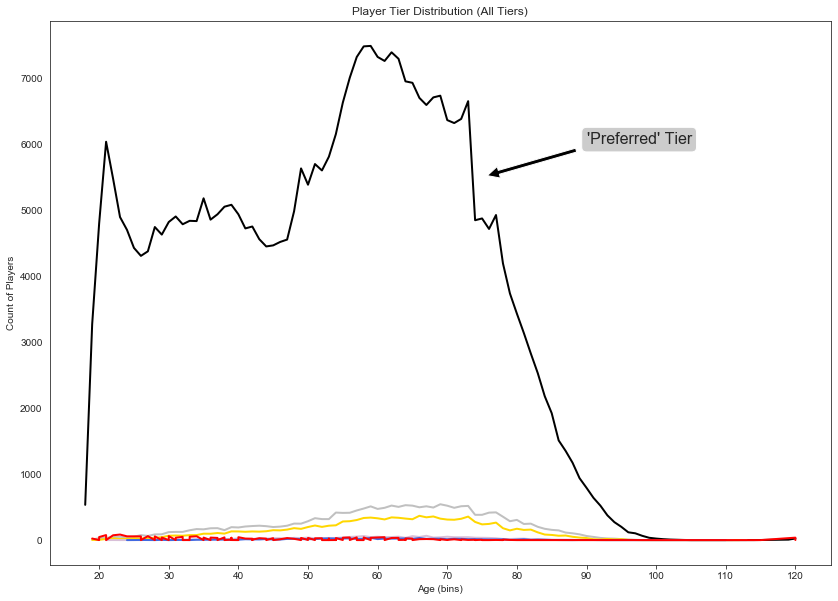

In [145]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (14, 10))

## Plot the first three type / subtype combinations
plt.plot(player_tier_x_vars[0], player_tier_y_vars[0], color = "black", lw = 2, label = "'Preferred' Tier")
plt.plot(player_tier_x_vars[1], player_tier_y_vars[1], color = "silver", lw = 2)
plt.plot(player_tier_x_vars[2], player_tier_y_vars[2], color = "gold", lw = 2)
plt.plot(player_tier_x_vars[3], player_tier_y_vars[3], color = "green", 
                                                     lw = 2)
plt.plot(player_tier_x_vars[4], player_tier_y_vars[4], color = "thistle", lw = 2)
plt.plot(player_tier_x_vars[5], player_tier_y_vars[5], color = "royalblue", lw = 2)

plt.plot(player_tier_x_vars[6], player_tier_y_vars[6], color = "red", lw = 2)

## Change the y-label for better desriptive text
## Set legend for first plot  
## Set a descriptive title

plt.xlabel("Age (bins)")
plt.ylabel("Count of Players")
plt.title("Player Tier Distribution (All Tiers)")
plt.xticks(np.arange(20, 130, step = 10))

plt.annotate("'Preferred' Tier", 
            xy = (75.0, 5500.0),
          xytext = (90.0, 6000.0),
         size = 16,
         bbox = dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(facecolor="black", shrink = 0.05))


ax = plt.gca()
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## And Player Tier by Age (Preferred Players Excluded)

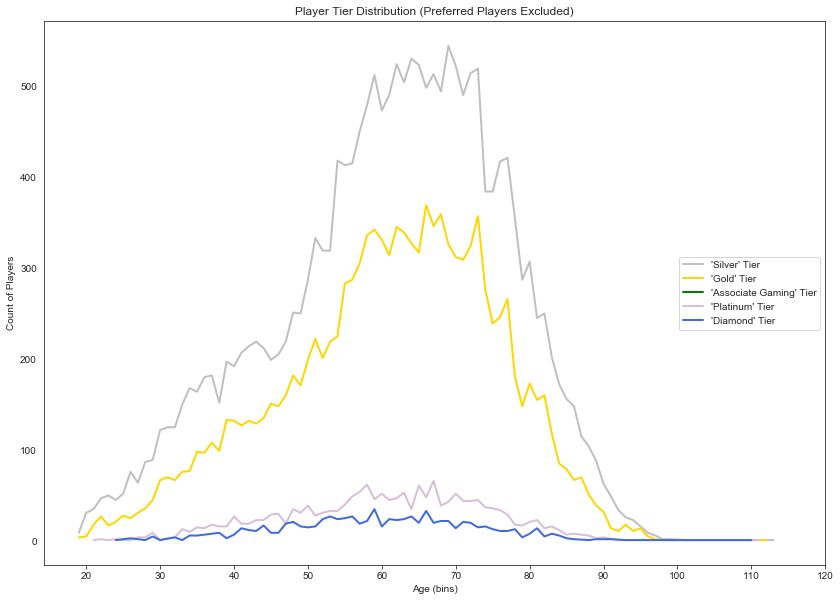

In [148]:
## Plot scores on each epoch of our first model
plt.figure(1, figsize = (14, 10))

## Plot each player tier and their distributions
plt.plot(player_tier_x_vars[1], player_tier_y_vars[1], color = "silver", lw = 2, label = "'Silver' Tier")
plt.plot(player_tier_x_vars[2], player_tier_y_vars[2], color = "gold", lw = 2, label = "'Gold' Tier")
plt.plot(player_tier_x_vars[3], player_tier_y_vars[3], color = "green", 
                                                     lw = 2, label = "'Associate Gaming' Tier")
plt.plot(player_tier_x_vars[4], player_tier_y_vars[4], color = "thistle", lw = 2, label = "'Platinum' Tier")
plt.plot(player_tier_x_vars[5], player_tier_y_vars[5], color = "royalblue", lw = 2, label = "'Diamond' Tier")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Set a descriptive title

plt.xlabel("Age (bins)")
plt.ylabel("Count of Players")
plt.title("Player Tier Distribution (Preferred Players Excluded)")
plt.legend(loc = "center right")

plt.xticks(np.arange(20, 130, step = 10))

ax = plt.gca()
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

# For the association rules analysis, you must switch over to R in order for the appropriate libraries to be pulled in.  The kernel can be changed (provided you have the correct environment set up) from here:

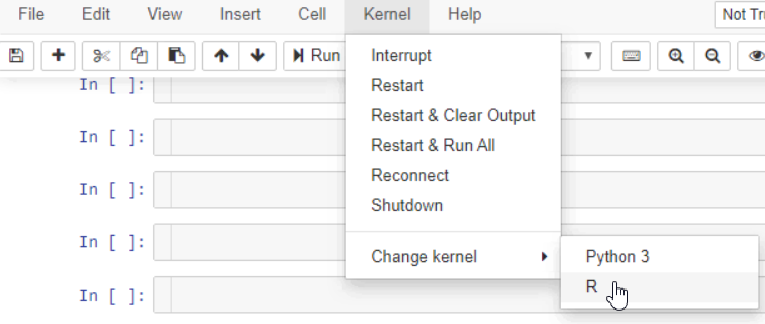

# <span style="color:#7a0019"> CHANGE THE KERNEL TO `R` HERE.</span>

# <span style="color:#7a0019">MCLV Exploratory Analytics - R Part I.</span>

In [1]:
## Bring in the libraries we need for the analysis
## Suppress the messages because they clog the notebook

suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(arules))

In [2]:
## This shows the version of R and all of the loaded packages in the notebook for this portion
## of the analysis

print(sessionInfo())

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows Server x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] arules_1.6-4  Matrix_1.2-17 dplyr_0.8.3   ggplot2_3.1.1 tidyr_1.0.0  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       pillar_1.3.1     compiler_3.6.1   plyr_1.8.4      
 [5] base64enc_0.1-3  tools_3.6.1      zeallot_0.1.0    digest_0.6.18   
 [9] uuid_0.1-2       jsonlite_1.6     evaluate_0.13    tibble_2.1.1    
[13] lifecycle_0.1.0  gtable_0.3.0     lattice_0.20-38  pkgconfig_2.0.2 
[17] rlang_0.4.0      IRdisplay_0.7.0  IRkernel_0.8.15  repr_0.19.2     
[21] withr_2.1.2      v

In [3]:
## Set the directory to load the data file - the fact table

data.dir = "D:/Group Folder/Datasets/"

## Set the file name

data.file = "FactCouponRedeem.csv"

In [4]:
## Create a look up to the CSV file

coupon_fact_table = paste(data.dir, data.file, sep = "")

# <span style="color:#7a0019">Data Loading & Pre-Processing - Reedemed Coupon Fact Table</span>

In [5]:
## Read in the fact table

suppressWarnings(suppressMessages(coupon_fact_df <- readr::read_csv(file = coupon_fact_table)))

In [6]:
## Confirm we loaded in ever row to the table

nrow(coupon_fact_df)

[1] 2777358

In [7]:
## Attach the df to R so we don't have to load it into memory everytime

attach(coupon_fact_df)

In [8]:
## Show the column names of our Redeemed Coupon Fact table

names(coupon_fact_df)

[1] "CouponID"           "Description"        "PlayerID"          
 [4] "AccountingDate"     "RedeemValue"        "RedeemCount"       
 [7] "SiteID"             "RedemptionNumber"   "ValidMonth"        
[10] "ValidYear"          "TypeCategory"       "TypeDescription"   
[13] "SubType"            "SubTypeDescription" "TargetPopKey"      
[16] "TargetPop"          "ProgramTypeKey"     "ProgramType"

## Carve out the columns that we require for the association rules analysis

- CouponID
- Month
- Year
- SiteID
- TargetPop
- ProgramType
- TypeDescription
- SubtypeDescription
- RedeemValue
- RedeemCount

In [9]:
## Create a list in R with columns we want to subset on

columns_required <- c("CouponID", "PlayerID", "ValidMonth", "ValidYear", "SiteID", "TargetPop", "ProgramType",
                      "TypeDescription", "SubTypeDescription", "RedeemValue", 
                     "RedeemCount")

In [10]:
## Subset the dataframe to only the columns we need for the association rules analysis
## We label it a transaction table since each couponID getting redeemed counts as a transcation

transaction_table <- coupon_fact_df[, columns_required]

In [11]:
## Show the structure of the "transaction" table

head(transaction_table)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89093,1000600137,10,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
4,1000681589,4,7,2,New Member,Not Applicable,Other,Other,0,1
71400,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1


In [12]:
## Filter the table a little more - to mirror our earlier work of removing any rows with a
## Redeem Count = 0

transaction_table_filtered <-
        transaction_table %>%
                filter(RedeemCount != 0) ## Remove any rows that have a zero redeem count

In [13]:
## Matching our row count from the first set of analyses in Python -success!

nrow(transaction_table_filtered)

[1] 2777131

In [14]:
## Create a unique identifier for every redeemed coupon by combining the coupon id and playerid
## This should allow us to differentiate between different "transactions"

transaction_table_filtered$TransactionID <-
        paste(transaction_table_filtered$CouponID, transaction_table_filtered$PlayerID)

In [45]:
## Subset the transcation table into Casino 1 and Casino 2 - likely differences between the two

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

In [16]:
## Show the row counts for the new Casino data frames

nrow(casino_1_df)

nrow(casino_2_df)

[1] 1171888

[1] 1605243

In [17]:
## Show the top 6 rows to see how the dataframe structure has changed

head(casino_1_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530342410
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710328524
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710004002
89729,530114875,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530114875
89729,530181290,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530181290
89729,530315284,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530315284


In [18]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -SiteID)

In [19]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_1_df[, 4:10])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29


## The `arules` library in R requires the data to under a significant transformation before it can be fed into the algorithm for generating the rules

In [20]:
#### We'll try this with one table first

trans_id <- as.character(casino_1_df[["TransactionID"]])
casino_1_df <- casino_1_df[, 4:10]

for (i in 1:ncol(casino_1_df)) casino_1_df[[i]] <- as.factor(casino_1_df[[i]])

trans <- as(casino_1_df, "transactions")

transactionInfo(trans)[["transactionID"]] <- trans_id

In [21]:
## Confirm the first set of transactions generated successfully

head(trans)

transactions in sparse format with
 6 transactions (rows) and
 414 items (columns)

## Use the apriori function to generate a set of rules based on the "transactions" we created above.  We just want to see if there's anything that could provide useful information from mining the coupon redemptions for association rules.

In [22]:
## Create a new set of rules based on the transactions above

casino_1_rules <- apriori(trans, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 234377 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[414 item(s), 1171888 transaction(s)] done [0.64s].
sorting and recoding items ... [8 item(s)] done [0.05s].
creating transaction tree ... done [0.56s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [36 rule(s)] done [0.00s].
creating S4 object  ... done [0.12s].


In [23]:
## Convert these rules into a dataframe, so that we can have them in a format that is easier to
## read and interpret

casino_1_arules_df <- DATAFRAME(casino_1_rules)

In [24]:
## Re-order the dataframe by lift

casino_1_arules_df <- casino_1_arules_df %>%
                            arrange(desc(lift))

## Assocation rules produces the following metrics:

1. `Support`: how often does these items appear together?<br>
    <i>count of itemsets (X, Y) / all transactions containing (X, Y)</i>

2. `Confidence` (strength of association): given my LHS, how often do we see our RHS?<br>
    <i>P(Y | X)</i>

3. `Lift` (co-occurence vs pure chance): how often do I see LHS with RHS, compared to pure chance or coincidence?<br>
    <i>supp(X -> Y) / s(X) * s(Y)</i>

4. `Count`: a raw count of occurences of the itemsets

In [42]:
## Show the first 20 rows of the dataframe with our new set of rules

head(casino_1_arules_df, 20)

LHS,RHS,support,confidence,lift,count
"{ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2275516,0.5068048,2.080282,266665
"{TargetPop=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2102803,0.5067939,2.080237,246425
"{TargetPop=Not Applicable,ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2102803,0.5067939,2.080237,246425
{SubTypeDescription=Bonus},{TypeDescription=Cash},0.2275610,0.9340698,2.080135,266676
{TypeDescription=Cash},{SubTypeDescription=Bonus},0.2275610,0.5067689,2.080135,266676
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2275516,0.9340673,2.080129,266665
"{TargetPop=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2102803,0.9290362,2.068925,246425
"{TargetPop=Not Applicable,ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2102803,0.9290362,2.068925,246425
"{ValidYear=17,ProgramType=Not Applicable}",{TargetPop=Not Applicable},0.3318722,0.9472357,1.236860,388917
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TargetPop=Not Applicable},0.2263424,0.9291039,1.213184,265248


## Our association rules dataframe does not give us much information for Casino 1.  Much of the data is being clouded by the Target Population being labeled "Not Applicable"; this doesn't really provide us much value.

## We can run the same analysis on Casino 2 and determine if there is any useful information to mine from this site.

In [46]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -SiteID)

In [47]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_2_df[, 4:10])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue
10,16,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5
4,7,New Member,Not Applicable,Other,Other,0
4,14,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10
4,14,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10
4,16,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5
1,17,VIP,Not Applicable,Hotel,HK,29


In [48]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df[["TransactionID"]])
casino_2_df <- casino_2_df[, 4:10]

for (i in 1:ncol(casino_2_df)) casino_2_df[[i]] <- as.factor(casino_2_df[[i]])

trans_2 <- as(casino_2_df, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [49]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 383 items (columns)

In [50]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 321048 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[383 item(s), 1605243 transaction(s)] done [0.86s].
sorting and recoding items ... [12 item(s)] done [0.06s].
creating transaction tree ... done [0.92s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [24 rule(s)] done [0.00s].
creating S4 object  ... done [0.21s].


In [51]:
## Convert our completed rules into a dataframe

casino_2_arules_df <- DATAFRAME(casino_2_rules)

In [52]:
## Re-order the dataframe by lift

casino_2_arules_df %>%
        arrange(desc(lift))

LHS,RHS,support,confidence,lift,count
"{TargetPop=Loyalty,TypeDescription=Hotel}",{ProgramType=Gazette},0.2073462,0.9747555,4.701017,332841
"{ProgramType=Gazette,TypeDescription=Hotel}",{TargetPop=Loyalty},0.2073462,1.0000000,4.602834,332841
"{TypeDescription=Hotel,RedeemValue=29}",{SubTypeDescription=All},0.2296836,0.8232696,3.083255,368698
"{TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.2296836,0.8601958,3.068169,368698
"{SubTypeDescription=All,RedeemValue=29}",{TypeDescription=Hotel},0.2296836,1.0000000,2.834596,368698
"{TargetPop=Loyalty,ProgramType=Gazette}",{TypeDescription=Hotel},0.2073462,0.9999820,2.834545,332841
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2601002,0.9679965,2.420022,417524
"{TargetPop=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2507159,0.9668384,2.417127,402460
"{TargetPop=Not Applicable,ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2507159,0.9668384,2.417127,402460
"{ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2601002,0.6552984,2.412789,417524


## The first set of rules we generated didn't provide much meaningful context into what patterns could be uncovered using this approach.

## As successful data scientists, we don't stop here though!  We think about what other meaningful information could be added that would add value.

## Therefore, we bring in player information using the "Player Day" table; we can use this to see what "tier" each player belongs to and if this has any influence on what coupons are being redeemed.

In [53]:
## Set up player file

player.file = "PlayerDay.csv"

## Set up player day table

player_day_table = paste(data.dir, player.file, sep = "")

In [54]:
## Read in the player day table - suppress warnings because they are annoying!

suppressWarnings(suppressMessages(player_day_df <- readr::read_csv(file = player_day_table)))

In [55]:
## Confirm we loaded in ever row to the table

nrow(player_day_df)

[1] 7292910

In [56]:
## Attach the df to R so we don't have to load it into memory everytime
## Especially since our Virtual Machines were getting hammered daily!!

suppressMessages(attach(player_day_df))

In [57]:
## Show the available columns

names(player_day_df)

[1] "SiteID"                 "PlayerID"               "Date_Value"            
 [4] "TtlBet"                 "Theo"                   "Actual"                
 [7] "Comp"                   "MktedCouponsRedemption" "KioskRedemptions"      
[10] "PointsToCash"           "XCUsed"                 "GamingDays"            
[13] "CoinIn"                 "SlotAct"                "SlotTheo"              
[16] "TableBet"               "TableAct"               "TableTheo"             
[19] "Slot_CompEarned"        "Slot_PointsEarned"      "Table_CompEarned"      
[22] "Table_PointsEarned"     "Days"                   "NonGamingPointsEarned" 
[25] "NonGamingCompEarned"    "ADT"                    "ADW"                   
[28] "TierID"                 "TierName"

In [58]:
## Pull out the columns need for merging

player_columns <- c("PlayerID", "TierName")

player_tier_df <- player_day_df[player_columns]

In [59]:
## Confirm this matches our original loading of the data table, with just the two columns we need

nrow(player_tier_df)

[1] 7292910

In [60]:
## De-duplicate the rows in this table so we have only unique player IDs and their tier information

player_tier_df_no_dupes <-
         player_tier_df %>%
                distinct(PlayerID, TierName)

In [61]:
## Print the de-duplicated row count and show the first few rows - to confirm its ready to be merged

print(nrow(player_tier_df_no_dupes))

head(player_tier_df_no_dupes)

[1] 395660


PlayerID,TierName
1000382937,Preferred
530533484,Preferred
530086340,Silver
710028836,Preferred
1000611579,Silver
710015699,Silver


In [62]:
## Create a new table and include the tier information from the de-duplicated PlayerDay table
## Now we overwrote the old file, but leave the test output to confirm the test was successful

transaction_table_filtered <- 
        left_join(transaction_table_filtered, player_tier_df_no_dupes, by = "PlayerID")

In [63]:
## Success!  We will overwrite the old DF with the new one including Tier information

head(transaction_table_filtered)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530342410,Diamond
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710328524,Silver
89093,1000600137,10,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1,89093 1000600137,Preferred
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710004002,Silver
4,1000681589,4,7,2,New Member,Not Applicable,Other,Other,0,1,4 1000681589,Preferred
71400,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1,71400 1000681589,Preferred


## As mentioned above, the Type Description = "Not Applicable" added a lot of background "noise" to the original set of rules.

## We remove these rows here as an extra step, before we continue with the generation of a new set of rules.

In [64]:
## Remove the rows with Not Applicable to generate the correct set of rules

transaction_table_filtered <- 
        transaction_table_filtered %>%
            filter(ProgramType != "Not Applicable")

In [65]:
## Confirm lower row count

nrow(transaction_table_filtered)

[1] 517888

In [66]:
## Create a unique identifier for every redeemed coupon by combining the coupon id and playerid
## This should allow us to differentiate between different "transactions"

transaction_table_filtered$TransactionID <-
        paste(transaction_table_filtered$CouponID, transaction_table_filtered$PlayerID)

## We ran an association rule learning algorithm on the merged data table, combining all redeemed coupons and tying them to each player and that player’s attributes.  The apriori algorithm uses a process to mine & discover frequent itemsets/patterns by identifying frequent individual items in a data table and then extending these item sets larger and larger.

In [67]:
## Subset the transcation table into Casino 1 and Casino 2 - likely differences between the two

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

In [68]:
## Show the row counts for the new tables

nrow(casino_1_df)

nrow(casino_2_df)

[1] 167168

[1] 350720

In [69]:
## Show the top 6 rows to see how the dataframe structure has changed

head(casino_1_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,24930,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 24930,Gold
89502,530005985,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530005985,Gold
89301,530086721,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530086721,Diamond
89502,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530517544,Silver
89503,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89503 530517544,Silver
89301,530483440,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530483440,Diamond


In [70]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -SiteID)

In [71]:
## Move the transactionID to the first column in the dataframe
## Remove RedeemCount since we don't really require it for this analysis
## And bring in Tier!

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -RedeemCount)

In [72]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_1_df[, 4:11])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,TierName
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Cash,Cash,25,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Silver
1,17,Loyalty,Gazette,Hotel,All,29,Silver
1,17,Loyalty,Gazette,Cash,Cash,25,Diamond


In [73]:
## Generate a new set of rules - we overwrite our earlier variables
## Normally this practice is frowned upon, but those rules were not very informative
## So we just overwrite them

trans_id <- as.character(casino_1_df[["TransactionID"]])
casino_1_df <- casino_1_df[, 4:11]

for (i in 1:ncol(casino_1_df)) casino_1_df[[i]] <- as.factor(casino_1_df[[i]])

trans <- as(casino_1_df, "transactions")

transactionInfo(trans)[["transactionID"]] <- trans_id

In [74]:
## Confirm the rules generated successfully

head(trans)

transactions in sparse format with
 6 transactions (rows) and
 72 items (columns)

In [75]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_1_rules <- apriori(trans, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 33433 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 167168 transaction(s)] done [0.08s].
sorting and recoding items ... [11 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [431 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [76]:
casino_1_arules_df <- DATAFRAME(casino_1_rules)

In [77]:
## Re-order the dataframe by lift

casino_1_arules_df <- casino_1_arules_df %>%
                            arrange(desc(lift))

# Here are a few examples of our “mined” results, for the first casino site:

In [78]:
## Show the first 20 rows of the dataframe

head(casino_1_arules_df, 20)

LHS,RHS,support,confidence,lift,count
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2660677,0.9258342,1.130185,44478
"{TargetPop=Loyalty,TierName=Gold}",{RedeemValue=29},0.2660677,0.9257378,1.130068,44478


## Wow, Redeem Value = $29 certainly took over from our first set of rules.

In [79]:
## Subset the transcation table into Casino 1 and Casino 2 again

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

## As a very final step, we will subset each dataframe by year as well, to generate a more consise and specific set of rules.

In [80]:
casino_1_df_17 <-
        casino_1_df %>%
            filter(ValidYear == 17)

casino_1_df_18 <-
        casino_1_df %>%
            filter(ValidYear == 18)

casino_1_df_19 <-
        casino_1_df %>%
            filter(ValidYear == 19)

In [81]:
nrow(casino_1_df_17)

nrow(casino_1_df_18)

nrow(casino_1_df_19)

[1] 59230

[1] 57214

[1] 50720

In [82]:
head(casino_1_df_17)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,24930,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 24930,Gold
89502,530005985,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530005985,Gold
89301,530086721,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530086721,Diamond
89502,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530517544,Silver
89503,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89503 530517544,Silver
89301,530483440,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530483440,Diamond


In [83]:
trans_id_2 <- as.character(casino_1_df_17[["TransactionID"]])
casino_1_df_17 <- casino_1_df_17[, 4:11]

for (i in 1:ncol(casino_1_df_17)) casino_1_df_17[[i]] <- as.factor(casino_1_df_17[[i]])

trans_2 <- as(casino_1_df_17, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [84]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 23 items (columns)

In [85]:
casino_1_rules_17 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 11846 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[23 item(s), 59230 transaction(s)] done [0.03s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [960 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [86]:
## Convert our completed rules into a dataframe

casino_1_arules_17_df <- DATAFRAME(casino_1_rules_17)

In [87]:
## Re-order the dataframe by lift

casino_1_arules_17_df <- casino_1_arules_17_df %>%
                            arrange(desc(lift))

In [88]:
## Show the first 20 rows of the dataframe

head(casino_1_arules_17_df, 5)

LHS,RHS,support,confidence,lift,count
"{ProgramType=Gazette,RedeemValue=29}",{SubTypeDescription=All},0.8647138,1,1.001268,51217
"{TypeDescription=Hotel,RedeemValue=29}",{SubTypeDescription=All},0.8821712,1,1.001268,52251
"{RedeemValue=29,RedeemCount=1}",{SubTypeDescription=All},0.8821543,1,1.001268,52250
"{SiteID=1,RedeemValue=29}",{SubTypeDescription=All},0.8821712,1,1.001268,52251
"{TargetPop=Loyalty,RedeemValue=29}",{SubTypeDescription=All},0.8821712,1,1.001268,52251


In [89]:
deduped_rules_casino1_17_df <- 
        casino_1_arules_17_df[ !duplicated(casino_1_arules_17_df[, c("lift")], fromLast = T), ]

In [90]:
deduped_rules_casino1_17_final_df <- 
        deduped_rules_casino1_17_df[ !duplicated(deduped_rules_casino1_17_df[, c("count")], fromLast = T), ]

In [91]:
head(deduped_rules_casino1_17_final_df)

,LHS,RHS,support,confidence,lift,count
78,"{ValidYear=17,SiteID=1,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.8821712,0.8832897,1.0012679,52251
108,"{ValidYear=17,SiteID=1,TargetPop=Loyalty,TypeDescription=Hotel}",{SubTypeDescription=All},0.9987337,0.9995607,1.0008280,59155
628,"{ValidYear=17,SiteID=1,TargetPop=Loyalty,RedeemCount=1}",{TypeDescription=Hotel},0.9991558,0.9991727,1.0000000,59180
650,"{ValidYear=17,SiteID=1,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemCount=1},0.9987169,0.9999831,1.0000000,59154
664,"{ValidYear=17,SiteID=1,TargetPop=Loyalty,ProgramType=Gazette}",{RedeemCount=1},0.9821543,0.9999828,0.9999997,58173
726,"{ValidYear=17,SiteID=1,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{RedeemCount=1},0.8821543,0.9999809,0.9999977,52250


In [92]:
trans_id_2 <- as.character(casino_1_df_18[["TransactionID"]])
casino_1_df_18 <- casino_1_df_18[, 4:11]

for (i in 1:ncol(casino_1_df_18)) casino_1_df_18[[i]] <- as.factor(casino_1_df_18[[i]])

trans_2 <- as(casino_1_df_18, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [93]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 20 items (columns)

In [94]:
casino_1_rules_18 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 11442 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[20 item(s), 57214 transaction(s)] done [0.03s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [960 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [95]:
## Convert our completed rules into a dataframe

casino_1_arules_18_df <- DATAFRAME(casino_1_rules_18)

In [96]:
## Re-order the dataframe by lift

casino_1_arules_18_df <- casino_1_arules_18_df %>%
                            arrange(desc(lift))

In [97]:
deduped_rules_casino1_18_df <- 
        casino_1_arules_18_df[ !duplicated(casino_1_arules_18_df[, c("lift")], fromLast = T), ]

In [98]:
deduped_rules_casino1_18_final_df <- 
        deduped_rules_casino1_18_df[ !duplicated(deduped_rules_casino1_18_df[, c("count")], fromLast = T), ]

In [99]:
head(deduped_rules_casino1_18_final_df)

,LHS,RHS,support,confidence,lift,count
62,"{ValidYear=18,SiteID=1,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.8544237,0.8647009,1.0088089,48885
866,"{ValidYear=18,SiteID=1,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,RedeemCount=1}",{SubTypeDescription=All},0.9880099,0.9881136,0.9999987,56528
928,"{ValidYear=18,SiteID=1,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,RedeemCount=1}",{RedeemValue=29},0.8570455,0.8571354,0.9999825,49035
960,"{ValidYear=18,SiteID=1,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{RedeemCount=1},0.8543189,0.9998773,0.9999821,48879


## Association Rules - Casino 1 - 2019

In [100]:
trans_id_2 <- as.character(casino_1_df_19[["TransactionID"]])
casino_1_df_19 <- casino_1_df_19[, 4:11]

for (i in 1:ncol(casino_1_df_19)) casino_1_df_19[[i]] <- as.factor(casino_1_df_19[[i]])

trans_2 <- as(casino_1_df_19, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

casino_1_rules_19 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

## Convert our completed rules into a dataframe
casino_1_arules_19_df <- DATAFRAME(casino_1_rules_19)

## Re-order the dataframe by lift
casino_1_arules_19_df <- casino_1_arules_19_df %>%
                            arrange(desc(lift))

deduped_rules_casino1_19_df <- 
        casino_1_arules_19_df[ !duplicated(casino_1_arules_19_df[, c("lift")], fromLast = T), ]

deduped_rules_casino1_19_final_df <- 
        deduped_rules_casino1_19_df[ !duplicated(deduped_rules_casino1_19_df[, c("count")], fromLast = T), ]

head(deduped_rules_casino1_19_final_df)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[46 item(s), 50720 transaction(s)] done [0.01s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [960 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


,LHS,RHS,support,confidence,lift,count
14,"{ValidYear=19,SiteID=1,TypeDescription=Hotel,RedeemValue=29}",{SubTypeDescription=All},0.6189669,0.8806912,1.141924,31394
340,"{ValidYear=19,SiteID=1,TypeDescription=Hotel,SubTypeDescription=All}",{TargetPop=Loyalty},0.7629535,0.9892630,1.047219,38697
362,"{ValidYear=19,SiteID=1,TypeDescription=Hotel,RedeemValue=29}",{TargetPop=Loyalty},0.6945584,0.9882459,1.046143,35228
384,"{ValidYear=19,SiteID=1,TargetPop=Loyalty,ProgramType=Gazette}",{RedeemValue=29},0.6945386,0.7352438,1.046135,35227
428,"{ValidYear=19,SiteID=1,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{TargetPop=Loyalty},0.6107058,0.9866535,1.044457,30975
550,"{ValidYear=19,SiteID=1,TargetPop=Loyalty}",{TypeDescription=Hotel},0.9420347,0.9972241,1.014364,47780


## Now perform the same set of transformations that we did for Casino 2 by year.

In [101]:
head(casino_2_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,1000019430,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000019430,Diamond
89502,1000301411,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000301411,Platinum
89502,710025187,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710025187,Diamond
89502,710271810,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710271810,Platinum
89502,710000644,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710000644,Gold
89502,710327072,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710327072,Gold


In [102]:
casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

# Now we subset data based on year, and the tables below will contain the first few rules from each year.

In [103]:
casino_2_df_17 <-
        casino_2_df %>%
            filter(ValidYear == 17)

casino_2_df_18 <-
        casino_2_df %>%
            filter(ValidYear == 18)

casino_2_df_19 <-
        casino_2_df %>%
            filter(ValidYear == 19)

In [104]:
nrow(casino_2_df_17)

nrow(casino_2_df_18)

nrow(casino_2_df_19)

[1] 123952

[1] 112314

[1] 114436

In [105]:
head(casino_2_df_17)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,1000019430,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000019430,Diamond
89502,1000301411,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000301411,Platinum
89502,710025187,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710025187,Diamond
89502,710271810,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710271810,Platinum
89502,710000644,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710000644,Gold
89502,710327072,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710327072,Gold


In [106]:
trans_id_2 <- as.character(casino_2_df_17[["TransactionID"]])
casino_2_df_17 <- casino_2_df_17[, 4:11]

for (i in 1:ncol(casino_2_df_17)) casino_2_df_17[[i]] <- as.factor(casino_2_df_17[[i]])

trans_2 <- as(casino_2_df_17, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

casino_2_rules_17 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

## Convert our completed rules into a dataframe
casino_2_arules_17_df <- DATAFRAME(casino_2_rules_17)

## Re-order the dataframe by lift
casino_2_arules_17_df <- casino_2_arules_17_df %>%
                            arrange(desc(lift))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24790 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[20 item(s), 123952 transaction(s)] done [0.07s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [960 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


## Association Rules - Casino 2 - Year 2017

In [107]:
deduped_rules_casino_2_17_df <- 
       casino_2_arules_17_df[ !duplicated(casino_2_arules_17_df[, c("lift")], fromLast = T), ]

deduped_rules_casino_2_17_final_df <- 
       deduped_rules_casino_2_17_df[ !duplicated(deduped_rules_casino_2_17_df[, c("count")], fromLast = T), ]

head(deduped_rules_casino_2_17_final_df)

,LHS,RHS,support,confidence,lift,count
628,"{ValidYear=17,SiteID=2,TargetPop=Loyalty,TypeDescription=Hotel}",{RedeemCount=1},0.9999516,0.9999677,1.0000000,123946
650,"{ValidYear=17,SiteID=2,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemCount=1},0.9993707,0.9999677,1.0000000,123874
664,"{ValidYear=17,SiteID=2,TargetPop=Loyalty,TypeDescription=Hotel}",{ProgramType=Gazette},0.9792016,0.9792174,0.9999997,121374
686,"{ValidYear=17,SiteID=2,TargetPop=Loyalty,ProgramType=Gazette}",{RedeemCount=1},0.9791855,0.9999670,0.9999993,121372
718,"{ValidYear=17,SiteID=2,TargetPop=Loyalty,TypeDescription=Hotel,RedeemCount=1}",{ProgramType=Gazette},0.9791694,0.9792168,0.9999990,121370
756,"{ValidYear=17,SiteID=2,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{RedeemCount=1},0.8911111,0.9999638,0.9999961,110455


In [108]:
trans_id_2 <- as.character(casino_2_df_18[["TransactionID"]])
casino_2_df_18 <- casino_2_df_18[, 4:11]

for (i in 1:ncol(casino_2_df_18)) casino_2_df_18[[i]] <- as.factor(casino_2_df_18[[i]])

trans_2 <- as(casino_2_df_18, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

casino_2_rules_18 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

## Convert our completed rules into a dataframe
casino_2_arules_18_df <- DATAFRAME(casino_2_rules_18)

## Re-order the dataframe by lift
casino_2_arules_18_df <- casino_2_arules_18_df %>%
                            arrange(desc(lift))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22462 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 112314 transaction(s)] done [0.07s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [960 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## Association Rules - Casino 2 - Year 2018

In [109]:
deduped_rules_casino_2_18_df <- 
       casino_2_arules_18_df[ !duplicated(casino_2_arules_18_df[, c("lift")], fromLast = T), ]

deduped_rules_casino_2_18_final_df <- 
       deduped_rules_casino_2_18_df[ !duplicated(deduped_rules_casino_2_18_df[, c("count")], fromLast = T), ]

head(deduped_rules_casino_2_18_final_df)

,LHS,RHS,support,confidence,lift,count
62,"{ValidYear=18,SiteID=2,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.8675677,0.8683486,1.0002944,97440
866,"{ValidYear=18,SiteID=2,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,RedeemCount=1}",{SubTypeDescription=All},0.9990562,0.9991007,1.0000000,112208
928,"{ValidYear=18,SiteID=2,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,RedeemCount=1}",{RedeemValue=29},0.8680485,0.8680872,0.9999932,97494
960,"{ValidYear=18,SiteID=2,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{RedeemCount=1},0.8675232,0.9999487,0.9999932,97435


In [110]:
trans_id_2 <- as.character(casino_2_df_19[["TransactionID"]])
casino_2_df_19 <- casino_2_df_19[, 4:11]

for (i in 1:ncol(casino_2_df_19)) casino_2_df_19[[i]] <- as.factor(casino_2_df_19[[i]])

trans_2 <- as(casino_2_df_19, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

casino_2_rules_19 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

## Convert our completed rules into a dataframe
casino_2_arules_19_df <- DATAFRAME(casino_2_rules_19)

## Re-order the dataframe by lift
casino_2_arules_19_df <- casino_2_arules_19_df %>%
                            arrange(desc(lift))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22887 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[68 item(s), 114436 transaction(s)] done [0.06s].
sorting and recoding items ... [10 item(s)] done [0.01s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [1016 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


## Association Rules - Casino 2 - Year 2019

## The analysis tells us is that for all of the redeemed coupons for 2019, these characteristics kept materializing or cropping up: they belonged to Hotel, and their redemption value was $29 (first row).

## Another slight variation to that “rule” is that many of the players redeeming these coupons belonged to the Gold tier, and that they were targeted towards “Loyalty” players.

In [111]:
deduped_rules_casino_2_19_df <- 
       casino_2_arules_19_df[ !duplicated(casino_2_arules_19_df[, c("lift")], fromLast = T), ]

deduped_rules_casino_2_19_final_df <- 
       deduped_rules_casino_2_19_df[ !duplicated(deduped_rules_casino_2_19_df[, c("count")], fromLast = T), ]

head(deduped_rules_casino_2_19_final_df)

,LHS,RHS,support,confidence,lift,count
46,"{ValidYear=19,SiteID=2,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.5572722,0.7744302,1.160241,63772
231,"{ValidYear=19,SiteID=2,TargetPop=Loyalty}",{ProgramType=Gazette},0.8663532,0.9501184,1.096687,99142
316,"{ValidYear=19,SiteID=2,TypeDescription=Hotel,SubTypeDescription=All}",{TargetPop=Loyalty},0.7121710,0.9896900,1.085380,81498
346,"{ValidYear=19,SiteID=2,TypeDescription=Hotel,RedeemValue=29}",{TargetPop=Loyalty},0.6587438,0.9869212,1.082344,75384
366,"{ValidYear=19,SiteID=2,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{TargetPop=Loyalty},0.5498532,0.9866869,1.082087,62923
420,"{ValidYear=19,SiteID=2,TypeDescription=Hotel,RedeemValue=29}",{ProgramType=Gazette},0.6145968,0.9207808,1.062824,70332
